<a href="https://colab.research.google.com/github/rociovald/GEOG5990M_Final/blob/main/GEOG5990M_Final_Project_201773481.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GEOG5990M Final Assignment

Student ID number: 201773481

## **Import required packages and libraries**

In [1]:
##  The following packages are installed
!pip install contextily   # This installs the contextily library.  It is helpful for displaying geographic data on maps.
!pip install geoplot      # This installs the geoplot library. It is useful for working with geospatial data, in maps and data visualisation.
!pip install git+https://github.com/pmdscully/geo_northarrow.git   # This installs the geo_northarrow library which connects to a GitHub repository containing north arrows.
!pip install folium       # Folium is used to create interactive maps in Python, based on Leaflet.js.
!pip install h3           # h3 is a geospatial indexing library developed by Uber. it allows you to divide the world into hierarchical hexagonal cells.
!pip install geoplot      # Geoplot is a geospatial visualisation library based on matplotlib and geopandas.
!pip install splot        # Splot is used to visualise spatial analyses such as the Moran Index and LISA.
!pip install esda         # Esda contains statistical tools for spatial data analysis (such as global and local Moran).


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 46.4 MB/s eta 0:00:00
  Cloning https://github.com/pmdscully/geo_northarrow.git to /tmp/pip-req-build-6fcne8o7
  Running command git clone --filter=blob:none --quiet https://github.com/pmdscully/geo_northarrow.git /tmp/pip-req-build-6fcne8o7
  Resolved https://github.com/pmdscully/geo_northarrow.git to commit 963bdd271707a3bcaa47b2d83d92b88ae0b10950
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for geo_northarrow: filename=geo_northarrow-0.2.0a0-py3-none-any.whl size=14724 sha256=311213d232a074b3e67919d392c8b9b3e6c212194259deda741fd6dab1cfb02d
  Stored in directory: /tmp/pip-ephem-wheel-cache-_b3v4de2/wheels/6a/22/96/2e5d1215f457d6b69b44cbaa1a0d3b822bc656dcabcda80095
Succe

In [2]:
## Now the libraries are called up
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings

#sns.set_style("darkgrid")
#warnings.filterwarnings("ignore")

#import pyproj
#import contextily as ctx

import geoplot as gplt
import geoplot.crs as gcrs
from geo_northarrow import add_north_arrow

from matplotlib import colors  # is used to extract a subset of a colourmap as a new colourmap in matplotlib (in visualisation)

import h3
from shapely.geometry import Point, Polygon
import folium

from esda.moran import Moran                    # Import the Moran class to calculate the global spatial autocorrelation index.
from libpysal.weights.contiguity import Queen   # Import the Queen method to generate a contiguity-based spatial weights matrix.
from splot.esda import moran_scatterplot        # Import the function to plot the Moran scatterplot.
from splot.esda import plot_moran               # Import plot_moran function from splot.esda
from esda.moran import Moran_Local              # Import Moran_Local class from esda.moran, to calculate LISA
from splot.esda import lisa_cluster             # # Import lisa_cluster function from splot.esda, to display Moran index results on a map.

## **Choose data**

In [3]:
## Read in the spatial dataframe

# Read 3 geojson:

gdfs_2019 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/Siniestros_transito_Antofa2019.geojson')
gdfs_2020 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/Siniestros_transito_Antofa2020.geojson')
gdfs_2021 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/Siniestros_transito_Antofa2021.geojson')
gdfs_2022 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/Siniestros_transito_Antofa2022.geojson')


**Information on geojson**

gdfs_2019: Traffic accidents recorded in the Antofagasta region, Chile, during 2019. <a href="#ref1">[1]</a>

gdfs_2020: Traffic accidents recorded in the Antofagasta region, Chile, during 2020. <a href="#ref2">[2]</a>

gdfs_2021: Traffic accidents recorded in the Antofagasta region, Chile, during 2021. <a href="#ref3">[3]</a>

gdfs_2022: Traffic accidents recorded in the Antofagasta region, Chile, during 2022. <a href="#ref4">[4]</a>

## Contexto (QUIZAS DEJARLO EN EL README)

La Organización Mundial de la Salud, en su informe más reciente sobre traumatismos causados por el tránsito (2023), indica que cada año se producen en todo el mundo aproximadamente 1,19 millones de muertes por accidentes de tránsito. https://www.who.int/es/news-room/fact-sheets/detail/road-traffic-injuries

En Chile, se registran en promedio alrededor de 1.500 muertes anuales por siniestros viales, una cifra que se ha mantenido relativamente estable en los últimos años, aunque con una leve disminución de 12% durante 2023 (CONASET, 2023). La mayoría de estos siniestros tienen como causa principal el factor humano, destacando la imprudencia del conductor y la imprudencia del peatón como las razones más frecuentes de accidentes con resultado fatal.

https://www.conaset.cl/programa/observatorio-datos-estadistica/#:~:text=Observatorio%20de%20Seguridad%20Vial,-El%20Observatorio%20de&text=Durante%20el%20a%C3%B1o%202024%20se,fallecidos%20informados%20el%20a%C3%B1o%202023.


En particular, en la región de Antoafgasta la cantidad de accidentes de trasnito ha ido en aumento, aunque se encuentra por debajo del pormedio nacional en numero de fallecidos y lesionados. La mayoria de los siniestros ocurren en el area urbana. Sin embargo más de la mitad de los decensos ocurren en contextos de ruralidad. fuente: chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.conaset.cl/wp-content/uploads/2023/06/Antofagasta-2022.pdf

La región de Antofasgata cuenta con una superficie de 126.049,1 km² y una población de 444,276 habitantes de acuerdo al Censo 2024. Administrativamente está compuesta por 3 provincias (Antofagasta, El Loa y Tocopilla), las que están divididas en 9 comunas (Antofagasta, Calama, Tocopilla, Mejillones, María Elena, Taltal, Sierra Gorda, San Pedro de Atacama y Ollagüe). Su capital regional es la ciudad de Antofagasta.

# **Data-preprocessing and data exploration**

The first thing to do is to explore the contents of the attribute table in each of the geojsons.

**Traffic accidents in 2019**

In [4]:
gdfs_2019.sample(2) # '.sample()' is used to select rows at random, it helps us to visualize their content.

FID   Ano  Idaccident  Codregion              Region       Comuna  \
2110  2111  2019     1216769          2  REGION ANTOFAGASTA       CALAMA   
272    273  2019     1211465          2  REGION ANTOFAGASTA  ANTOFAGASTA   

        Zona          Calle1    Calle2 Numero  ...  Estado_Cal  Cód_Condi  \
2110  URBANA     ARTURO PRAT  HAMBURGO   NULL  ...       BUENO          1   
272   URBANA  ANTONIO RENDIC   PISAGUA   NULL  ...       BUENO          1   

      Condición Cód_Est_1  Estado_Atm  Fallecidos Graves  Menos_Grav Leves  \
2110       SECO         1   DESPEJADO           0      0           0     1   
272        SECO         1   DESPEJADO           0      0           0     4   

                         geometry  
2110  POINT (-68.93584 -22.44379)  
272    POINT (-70.38702 -23.6228)  

[2 rows x 44 columns]

In [5]:
gdfs_2019.info()  # ‘.info()’ is used to observe if there is null data in any variable,  by looking at the ‘Non-Null Count’ column.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2494 entries, 0 to 2493
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   FID         2494 non-null   int32              
 1   Ano         2494 non-null   int32              
 2   Idaccident  2494 non-null   int32              
 3   Codregion   2494 non-null   int32              
 4   Region      2494 non-null   object             
 5   Comuna      2494 non-null   object             
 6   Zona        2494 non-null   object             
 7   Calle1      2494 non-null   object             
 8   Calle2      2494 non-null   object             
 9   Numero      2494 non-null   object             
 10  lat         2494 non-null   float64            
 11  lng         2494 non-null   float64            
 12  Claseaccid  2494 non-null   int32              
 13  Fecha       2494 non-null   datetime64[ms, UTC]
 14  Cód_Comun   2494 non-null   int3

In [6]:
# All column names are displayed, since only part of the column name can be displayed in the previous code.
gdfs_2019.columns

Index(['FID', 'Ano', 'Idaccident', 'Codregion', 'Region', 'Comuna', 'Zona',
       'Calle1', 'Calle2', 'Numero', 'lat', 'lng', 'Claseaccid', 'Fecha',
       'Cód_Comun', 'Cód_Tipo_', 'Tipo_Accid', 'Cód_Tipo1', 'Tipo__CONA',
       'Cód_Zona', 'Zona_1', 'Cód_Ubica', 'Ubicación', 'Cód_Causa',
       'Causa__CON', 'Cód_Cau_1', 'Causa', 'Pistas_de_', 'Pistas_de1',
       'Cód_Calza', 'Calzada', 'Cód__Tipo', 'Tipo_Calza', 'Cód_Estad',
       'Estado_Cal', 'Cód_Condi', 'Condición', 'Cód_Est_1', 'Estado_Atm',
       'Fallecidos', 'Graves', 'Menos_Grav', 'Leves', 'geometry'],
      dtype='object')

In [7]:
gdfs_2019.crs  # The coordinate system it has is displayed.

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**Traffic accidents in 2020**

In [8]:
gdfs_2020.sample(2) # 2 random rows are displayed to see the contents of their columns.

FID  COD_REG              REGION   CUT       COMUNA  \
868    869        2  REGION ANTOFAGASTA  2101  ANTOFAGASTA   
1666  1667        2  REGION ANTOFAGASTA  2201       CALAMA   

               CALLE_UNO  CALLE_DOS  NUMERO  \
868   GRAL OSCAR BONILLA  SAN PABLO       0   
1666          18 DE MAYO               1914   

                                           DIR_GEOCOD        LAT  ...  \
868   San Pablo & Avenida Bonilla, Antofagasta, Chile -23.610525  ...   
1666      18 de Mayo 1914, Calama, Antofagasta, Chile -22.473499  ...   

            Tipo_Accid  Tipo__CONA    Zona                 Causa__CON  \
868   COLISION LATERAL    COLISION  URBANA  IMPRUDENCIA DEL CONDUCTOR   
1666            CHOQUE      CHOQUE  URBANA       ALCOHOL EN CONDUCTOR   

                                                  Causa Fallecidos Graves  \
868   CONDUCCION NO ATENTO CONDICIONES TRANSITO MOMENTO          0      0   
1666                   CONDUCCION EN ESTADO DE EBRIEDAD          0      0   

     Menos_Grav Leves                     geometry  
868           0     0  POINT (-70.37907 -23.61052)  
1666          0     0   POINT (-68.92532 -22.4735)  

[2 rows x 26 columns]

In [9]:
gdfs_2020.info()  # ‘.info()’ is used to observe if there is null data in any variable,  by looking at the ‘Non-Null Count’ column.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   FID         1951 non-null   int32              
 1   COD_REG     1951 non-null   int32              
 2   REGION      1951 non-null   object             
 3   CUT         1951 non-null   int32              
 4   COMUNA      1951 non-null   object             
 5   CALLE_UNO   1951 non-null   object             
 6   CALLE_DOS   1951 non-null   object             
 7   NUMERO      1951 non-null   int32              
 8   DIR_GEOCOD  1951 non-null   object             
 9   LAT         1951 non-null   float64            
 10  LNG         1951 non-null   float64            
 11  VAL_COM     1951 non-null   int32              
 12  TIPO        1951 non-null   object             
 13  Año         1951 non-null   int32              
 14  Idaccident  1951 non-null   int3

In [10]:
# All column names are displayed, since only part of the column name can be displayed in the previous code.
gdfs_2020.columns

Index(['FID', 'COD_REG', 'REGION', 'CUT', 'COMUNA', 'CALLE_UNO', 'CALLE_DOS',
       'NUMERO', 'DIR_GEOCOD', 'LAT', 'LNG', 'VAL_COM', 'TIPO', 'Año',
       'Idaccident', 'Fecha', 'Tipo_Accid', 'Tipo__CONA', 'Zona', 'Causa__CON',
       'Causa', 'Fallecidos', 'Graves', 'Menos_Grav', 'Leves', 'geometry'],
      dtype='object')

In [11]:
gdfs_2020.crs  # The coordinate system it has is displayed

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**Traffic accidents in 2021**

In [12]:
gdfs_2021.sample(2) # '.sample()' is used to select rows at random, it helps us to visualize their content.

FID  FID_1  LABELID    POINT_X    POINT_Y  FID_2   COMUNAREAL  VAL_COM  \
424    425   4530  1328879 -68.920474 -22.447771    111       CALAMA        1   
1929  1930   2479  1377060 -70.381329 -23.567773    229  ANTOFAGASTA        1   

      OBJECTID   A_O  ...  Cód_Condi Condición  Cód_Est_1 Estado_Atm  \
424       4040  2021  ...          1      SECO          1  DESPEJADO   
1929     36342  2021  ...          1      SECO          1  DESPEJADO   

     Fallecidos Graves  Menos_Grav Leves Ilesos                     geometry  
424           0      0           0     0      1  POINT (-68.92047 -22.44777)  
1929          0      0           0     0      2  POINT (-70.38133 -23.56777)  

[2 rows x 70 columns]

In [13]:
gdfs_2021.info()  # ‘.info()’ is used to observe if there is null data in any variable,  by looking at the ‘Non-Null Count’ column.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 70 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   FID         2416 non-null   int32              
 1   FID_1       2416 non-null   int32              
 2   LABELID     2416 non-null   int32              
 3   POINT_X     2416 non-null   float64            
 4   POINT_Y     2416 non-null   float64            
 5   FID_2       2416 non-null   int32              
 6   COMUNAREAL  2416 non-null   object             
 7   VAL_COM     2416 non-null   int32              
 8   OBJECTID    2416 non-null   int32              
 9   A_O         2416 non-null   int32              
 10  IDACCIDENT  2416 non-null   int32              
 11  REGION      2416 non-null   object             
 12  COD_COMUN   2416 non-null   int32              
 13  COMUNA      2416 non-null   object             
 14  CALLE_UNO   2416 non-null   obje

In [14]:
# All column names are displayed, since only part of the column name can be displayed in the previous code.
gdfs_2021.columns

Index(['FID', 'FID_1', 'LABELID', 'POINT_X', 'POINT_Y', 'FID_2', 'COMUNAREAL',
       'VAL_COM', 'OBJECTID', 'A_O', 'IDACCIDENT', 'REGION', 'COD_COMUN',
       'COMUNA', 'CALLE_UNO', 'CALLE_DOS', 'NUMERO', 'DIR_GEOCOD', 'PAIS',
       'TIPO', 'OBJECTID_1', 'Año', 'Idaccide_1', 'Claseaccid', 'Fecha',
       'Hora', 'Cód_Regi', 'Región', 'Cód_Comun', 'Comuna_1', 'Cód_Tipo_',
       'Tipo_Accid', 'Cód_Tipo1', 'Tipo__CONA', 'Cód_Zona', 'Zona',
       'Cód_Ubica', 'Ubicación', 'Cód_Causa', 'Causa__CON', 'Cód_Cau_1',
       'Causa', 'Cód_Calle', 'Calle_Un_1', 'Cód_Cal_1', 'Calle_Do_1',
       'Intersecci', 'Número', 'Ruta', 'Cód_Ruta', 'Ubicaci_1', 'Km_Vía_Fe',
       'Pistas_de_', 'Pistas_de1', 'Cód_Calza', 'Calzada', 'Cód__Tipo',
       'Tipo_Calza', 'Cód_Estad', 'Estado_Cal', 'Cód_Condi', 'Condición',
       'Cód_Est_1', 'Estado_Atm', 'Fallecidos', 'Graves', 'Menos_Grav',
       'Leves', 'Ilesos', 'geometry'],
      dtype='object')

In [15]:
gdfs_2021.crs  # The coordinate system it has is displayed.

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**Traffic accidents in 2022**

In [16]:
gdfs_2022.sample(2)  # '.sample()' is used to select rows at random, it helps us to visualize their content.

FID    POINT_X    POINT_Y  Idaccident   Año  Claseaccid  \
1720  1721 -68.924302 -22.492881     1432876  2022           1   
2193  2194 -70.383553 -23.618523     1495014  2022           1   

                         Fecha  Cód_Regi              Región  Cód_Comun  ...  \
1720 2022-04-01 00:00:00+00:00         2  REGION ANTOFAGASTA       2201  ...   
2193 2022-12-08 00:00:00+00:00         2  REGION ANTOFAGASTA       2101  ...   

     Cód_Condi  Condición Cód_Est_1  Estado_Atm Fallecidos  Graves Menos_Grav  \
1720         1       SECO         1   DESPEJADO          0       0          0   
2193         1       SECO         1   DESPEJADO          0       0          0   

      Leves Ilesos                     geometry  
1720      1      0   POINT (-68.9243 -22.49288)  
2193      0      2  POINT (-70.38355 -23.61852)  

[2 rows x 50 columns]

In [17]:
gdfs_2022.info()  # ‘.info()’ is used to observe if there is null data in any variable,  by looking at the ‘Non-Null Count’ column.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   FID         2366 non-null   int32              
 1   POINT_X     2366 non-null   float64            
 2   POINT_Y     2366 non-null   float64            
 3   Idaccident  2366 non-null   int32              
 4   Año         2366 non-null   int32              
 5   Claseaccid  2366 non-null   int32              
 6   Fecha       2366 non-null   datetime64[ms, UTC]
 7   Cód_Regi    2366 non-null   int32              
 8   Región      2366 non-null   object             
 9   Cód_Comun   2366 non-null   int32              
 10  Comuna      2366 non-null   object             
 11  Cód_Tipo    2366 non-null   int32              
 12  Tipo_Accid  2366 non-null   object             
 13  Cód_Tip_1   2366 non-null   int32              
 14  Tipo__CONA  2366 non-null   obje

In [18]:
# All column names are displayed, since only part of the column name can be displayed in the previous code.
gdfs_2022.columns

Index(['FID', 'POINT_X', 'POINT_Y', 'Idaccident', 'Año', 'Claseaccid', 'Fecha',
       'Cód_Regi', 'Región', 'Cód_Comun', 'Comuna', 'Cód_Tipo', 'Tipo_Accid',
       'Cód_Tip_1', 'Tipo__CONA', 'Cód_Zona', 'Zona', 'Cód_Ubica', 'Ubicación',
       'Cód_Causa', 'Causa', 'Cód_Cau_1', 'Causa__CON', 'Cód_Calle',
       'Calle_Uno', 'Cód_Cal_1', 'Calle_Dos', 'Intersecci', 'Número', 'Ruta',
       'Cód_Ruta', 'Ubicaci_1', 'Pistas_de', 'Pistas_d_1', 'Cód_Calza',
       'Calzada', 'Cód__Tipo', 'Tipo_Calza', 'Cód_Estad', 'Estado_Cal',
       'Cód_Condi', 'Condición', 'Cód_Est_1', 'Estado_Atm', 'Fallecidos',
       'Graves', 'Menos_Grav', 'Leves', 'Ilesos', 'geometry'],
      dtype='object')

As with the previous GeoJSONs, the attributes are quite similar, though often labeled differently for the same concept. To keep the explanation concise, only the variables present in all four files and relevant to the analysis will be discussed (these will later be renamed in English).

*   'Año': Year when the accident
*   'Fecha': Date and time of the accident
*   'Región': Name of the region where the accident
*   'Comuna': Name of the commune where the accident
*   'Tipo__CONA': Subtype of accident according to CONASET classification
*   'Causa__CON': Secondary cause according to CONASET classification
*   'Fallecidos': Number of fatalities in the accident
*   'Graves': Number of people with serious injuries
*   'Menos_Grav': Number of people with less serious injuries
*   'Leves': Number of people with minor injuries
*   'geometry': List the type of geometry, in this case POINT

In [19]:
gdfs_2022.crs     # The coordinate system it has is displayed

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

*Coordinate Reference Systems (CRS)*

Before visualizing the layers, it is crucial to ensure they all share the same coordinate system. The GeoJSON files use EPSG:4326 (geographic coordinates with WGS 1984 datum), but for the study area, EPSG:32719 (WGS 1984 UTM 19S) will be used to enable processing in meters.

In [20]:
gdfs = [gdfs_2019, gdfs_2020, gdfs_2021, gdfs_2022] # a list is created for each year.

In [21]:
gdfs_utm = [gdf.to_crs(epsg=32719) for gdf in gdfs] # a for loop is used to change the CRS gdfs_2019_utm, gdfs_2020_utm.

In [22]:
gdfs_2019_utm, gdfs_2020_utm, gdfs_2021_utm, gdfs_2022_utm = gdfs_utm # gdfs_utm is redefined.

In [23]:
for gdf in gdfs_utm: print(gdf.crs) # The result is printed.

EPSG:32719
EPSG:32719
EPSG:32719
EPSG:32719


In [24]:
# Check the row and column of dataframe.
gdfs_2019_utm.shape

(2494, 44)

In [25]:
# Check the row and column of dataframe.
gdfs_2020_utm.shape

(1951, 26)

In [26]:
# Check the row and column of dataframe.
gdfs_2021_utm.shape

(2416, 70)

In [27]:
# Check the row and column of dataframe.
gdfs_2022_utm.shape

(2366, 50)

The number of rows and columns varies from year to year, reflecting the lack of uniformity in data recording.

## **Data cleaning**

The columns are checked in common.

In [28]:
gdfs = [gdfs_2019_utm, gdfs_2020_utm, gdfs_2021_utm, gdfs_2022_utm] # A list called gdfs was created that contains traffic accidents from the four years under study.

In [29]:
gdf_columns = [gdf.columns for gdf in gdfs] # a list called gdf_columns is created that has all the columns of the GeoDataFrame in gdfs.
gdf_columns_intersection = set.intersection(*map(set, gdf_columns)) # convert each list of columns into a set and then use 'set.intersection' to find the common columns.

In [30]:
# Common columns between all data frames are identified.
gdf_columns_intersection

{'Causa',
 'Causa__CON',
 'FID',
 'Fallecidos',
 'Fecha',
 'Graves',
 'Leves',
 'Menos_Grav',
 'Tipo_Accid',
 'Tipo__CONA',
 'Zona',
 'geometry'}

In [31]:
# Different columns between data frames are identified.
for cols in gdf_columns:
  print([col for col in cols if col not in gdf_columns_intersection]) # prints the columns that are not in the column intersection.

['Ano', 'Idaccident', 'Codregion', 'Region', 'Comuna', 'Calle1', 'Calle2', 'Numero', 'lat', 'lng', 'Claseaccid', 'Cód_Comun', 'Cód_Tipo_', 'Cód_Tipo1', 'Cód_Zona', 'Zona_1', 'Cód_Ubica', 'Ubicación', 'Cód_Causa', 'Cód_Cau_1', 'Pistas_de_', 'Pistas_de1', 'Cód_Calza', 'Calzada', 'Cód__Tipo', 'Tipo_Calza', 'Cód_Estad', 'Estado_Cal', 'Cód_Condi', 'Condición', 'Cód_Est_1', 'Estado_Atm']
['COD_REG', 'REGION', 'CUT', 'COMUNA', 'CALLE_UNO', 'CALLE_DOS', 'NUMERO', 'DIR_GEOCOD', 'LAT', 'LNG', 'VAL_COM', 'TIPO', 'Año', 'Idaccident']
['FID_1', 'LABELID', 'POINT_X', 'POINT_Y', 'FID_2', 'COMUNAREAL', 'VAL_COM', 'OBJECTID', 'A_O', 'IDACCIDENT', 'REGION', 'COD_COMUN', 'COMUNA', 'CALLE_UNO', 'CALLE_DOS', 'NUMERO', 'DIR_GEOCOD', 'PAIS', 'TIPO', 'OBJECTID_1', 'Año', 'Idaccide_1', 'Claseaccid', 'Hora', 'Cód_Regi', 'Región', 'Cód_Comun', 'Comuna_1', 'Cód_Tipo_', 'Cód_Tipo1', 'Cód_Zona', 'Cód_Ubica', 'Ubicación', 'Cód_Causa', 'Cód_Cau_1', 'Cód_Calle', 'Calle_Un_1', 'Cód_Cal_1', 'Calle_Do_1', 'Intersecci', '

In [32]:
# All column names that are not the same between gdfs are observed, and the columns to be used are renamed:
renames = {
  'Ano': 'Year',
  'Año': 'Year',
  'Region': 'Region',
  'REGION': 'Region',
  'Región': 'Region',
  'COMUNA': 'Commune',
  'Comuna': 'Commune',
  'Fallecidos': 'Fatalities',
  'Graves':'Serious',
  'Menos_Grav': 'Less serious',
  'Menos_grav': 'Less serious',
  'Leves': 'Slight',
  'Tipo__CONA': 'Type',
  'Causa__CON': 'Cause',
  'Fecha': 'Date'
  }

In [33]:
# Only select some columns that will be used later.
select = ['Year', 'Region', 'Commune', 'Date', 'Type', 'Cause', 'Fatalities', 'Serious', 'Less serious', 'Slight', 'geometry']

In [34]:
gdfs = [gdf.rename(columns=renames)[select] for gdf in gdfs] # A list of gdfs is created with the columns already renamed and selected.
gdfs_2019_utm, gdfs_2020_utm, gdfs_2021_utm, gdfs_2022_utm =gdfs # Each gdfs in the list is assigned to a specific variable, which corresponds to each year.

In [35]:
gdfs_2019_utm.sample(3) # Check if the previous code was executed correctly.

Year              Region      Commune                      Date  \
1882  2019  REGION ANTOFAGASTA  ANTOFAGASTA 2019-04-16 00:00:00+00:00   
2185  2019  REGION ANTOFAGASTA       CALAMA 2019-08-26 00:00:00+00:00   
492   2019  REGION ANTOFAGASTA  ANTOFAGASTA 2019-06-02 00:00:00+00:00   

          Type                      Cause  Fatalities  Serious  Less serious  \
1882    CHOQUE  IMPRUDENCIA DEL CONDUCTOR           0        0             0   
2185  COLISION  IMPRUDENCIA DEL CONDUCTOR           0        0             0   
492   COLISION  IMPRUDENCIA DEL CONDUCTOR           0        0             0   

      Slight                        geometry  
1882       0  POINT (359716.153 7391177.358)  
2185       2   POINT (506410.69 7516374.715)  
492        0  POINT (359090.594 7386199.196)

## Concatenation

 The four GeoJSONs will now be merged into a single file. This will allow the total number of fatalities —serious, less serious, and slight— to be displayed per year in a single table.

However, there are duplicate columns in one of the DataFrames, which may have occurred when renaming them.

In [36]:
# Each DatFrame is displayed (in order, starting from 2019 to 2022) and it is observed that the
# for the year 2021 (the third) has the 'Region' column repeated.
for gdf in gdfs: # A for loop is created to iterate each element of the gdfs list.
    print(gdf.columns)  # The column name is displayed.

Index(['Year', 'Region', 'Commune', 'Date', 'Type', 'Cause', 'Fatalities',
       'Serious', 'Less serious', 'Slight', 'geometry'],
      dtype='object')
Index(['Year', 'Region', 'Commune', 'Date', 'Type', 'Cause', 'Fatalities',
       'Serious', 'Less serious', 'Slight', 'geometry'],
      dtype='object')
Index(['Year', 'Region', 'Region', 'Commune', 'Date', 'Type', 'Cause',
       'Fatalities', 'Serious', 'Less serious', 'Slight', 'geometry'],
      dtype='object')
Index(['Year', 'Region', 'Commune', 'Date', 'Type', 'Cause', 'Fatalities',
       'Serious', 'Less serious', 'Slight', 'geometry'],
      dtype='object')


It is identified that there were duplicate columns in one of the DataFrames (gdfs_2021), which needs to be corrected before concatenating all the DataFrames into one, otherwise it will throw an error <a href="#ref5">[5]</a>.

In [37]:
# Duplicate columns are removed.
gdfs_2021_utm = gdfs_2021_utm.loc[:,~gdfs_2021_utm.columns.duplicated()].copy() # '.loc' selects columns that are not duplicated.

In [38]:
# It is reviewed and the duplicate column no longer appears.
gdfs_2021_utm.sample()

Year              Region      Commune                      Date    Type  \
781  2021  REGION ANTOFAGASTA  ANTOFAGASTA 2021-11-22 00:00:00+00:00  CHOQUE   

                         Cause  Fatalities  Serious  Less serious  Slight  \
781  IMPRUDENCIA DEL CONDUCTOR           0        0             0       0   

                         geometry  
781  POINT (357886.386 7382418.8)

In [39]:
# By fixing the error there are no problems with concatenating.
gdfs_all = pd.concat([gdfs_2019_utm, gdfs_2020_utm, gdfs_2021_utm, gdfs_2022_utm], ignore_index=True)

In [40]:
# It is checked that the data for each year has been integrated.
gdfs_all.sample(5)

Year              Region      Commune                      Date  \
6280  2021  REGION ANTOFAGASTA  ANTOFAGASTA 2021-03-18 00:00:00+00:00   
4574  2021  REGION ANTOFAGASTA  ANTOFAGASTA 2021-06-23 00:00:00+00:00   
8555  2022  REGION ANTOFAGASTA  ANTOFAGASTA 2022-03-24 00:00:00+00:00   
8606  2022  REGION ANTOFAGASTA  ANTOFAGASTA 2022-04-03 00:00:00+00:00   
5436  2021  REGION ANTOFAGASTA  ANTOFAGASTA 2021-03-22 00:00:00+00:00   

          Type                      Cause  Fatalities  Serious  Less serious  \
6280    CHOQUE  IMPRUDENCIA DEL CONDUCTOR           0        0             0   
4574    CHOQUE  IMPRUDENCIA DEL CONDUCTOR           0        0             0   
8555  COLISION  IMPRUDENCIA DEL CONDUCTOR           0        0             0   
8606    CHOQUE               OTRAS CAUSAS           0        0             0   
5436    CHOQUE  IMPRUDENCIA DEL CONDUCTOR           0        0             0   

      Slight                        geometry  
6280       0  POINT (359010.815 7391586.298)  
4574       0  POINT (357721.375 7383609.636)  
8555       0  POINT (357520.903 7382372.924)  
8606       1  POINT (356844.826 7382428.948)  
5436       0  POINT (359661.026 7386860.715)

The contents of the 'Commune', 'Type', and 'Cause' columns in gdfs_all have been renamed from Spanish to English.

In [41]:
#Identify the communes
communes = np.sort(gdfs_all['Commune'].unique()) # With 'np.sort' the communes are sorted alphabetically, with .unique() the duplicates are eliminated, obtaining the list of communes.
communes

array(['ANTOFAGASTA', 'CALAMA', 'MARIA ELENA', 'MEJILLONES',
       'SAN PEDRO AT', 'SAN PEDRO ATACAMA', 'SIERRA GORDA', 'TALTAL',
       'TOCOPILLA'], dtype=object)

In [42]:
# The name of the communes is changed (from uppercase to lowercase) using '.replace'.
gdfs_all.replace({'ANTOFAGASTA': 'Antofagasta',
                  'CALAMA': 'Calama',
                  'MARIA ELENA': 'Maria Elena',
                  'MEJILLONES': 'Mejillones',
                  'SAN PEDRO AT': 'San Pedro Atacama',
                  'SAN PEDRO ATACAMA': 'San Pedro Atacama',
                  'SIERRA GORDA': 'Sierra Gorda',
                  'TALTAL':'Taltal',
                  'TOCOPILLA':'Tocopilla'}, inplace=True)  # With 'inplace=True' the changes are applied directly to the original DataFrame, without the need to reassign it.

In [43]:
gdfs_all['Type'].unique() # unique() returns an array of all unique (non-repeating) values ​​that exist in that column.

array(['CHOQUE', 'COLISION', 'ATROPELLO', 'CAIDA', 'VOLCADURA',
       'OTRO TIPO'], dtype=object)

In [44]:
# The contents of the 'Type' column are translated into English using '.replace
gdfs_all.replace({'COLISION': 'Collision',
             'ATROPELLO': 'Hit-and-run',
             'CHOQUE': 'Crash',
             'VOLCADURA': 'Overturning',
             'CAIDA': 'Drop',
             'INCENDIO': 'Fire',
             'OTRO TIPO': 'Another'}, inplace=True)  # With 'inplace=True' the changes are applied directly to the original DataFrame, without the need to reassign it.

In [45]:
gdfs_all['Cause'].unique()  # unique() returns an array of all unique (non-repeating) values ​​that exist in that column.

array(['IMPRUDENCIA DEL CONDUCTOR', 'OTRAS CAUSAS',
       'CAUSAS NO DETERMINADAS', 'PERDIDA CONTROL VEHICULO',
       'ALCOHOL EN CONDUCTOR', 'DESOBEDIENCIA A SEÑALIZACION',
       'IMPRUDENCIA DEL PEATON', 'ALCOHOL EN PEATON',
       'DROGAS Y/O FATIGA EN CONDUCTOR', 'FALLAS MECANICAS',
       'IMPRUDENCIA DEL PASAJERO', 'DEFICIENCIAS VIALES',
       'VELOCIDAD IMPRUDENTE', 'ALCOHOL EN PASAJERO'], dtype=object)

In [46]:
# The contents of the 'Cause' column are translated into English using '.replace
gdfs_all.replace(
    {'IMPRUDENCIA DEL CONDUCTOR': 'Driver negligence',
    'OTRAS CAUSAS': 'Other causes',
    'CAUSAS NO DETERMIANDAS': 'Undetermined causes',
    'DESOBEDIENCIA A SEÑALIZACION': 'Sign disobedience',
    'IMPRUDENCIA DEL PEATON': 'Pedestrian Negligence',
    'CONDICIONES AMBIENTALES': 'Enviromental conditions',
    'VELOCIDAD IMPRUDENTE':'Reckless speed',
    'NO MANTENER DISTANCIA': 'Not keeping distance',
    'MANIOBRA IMPRUDENTE':'Reckless maneuver',
    'PERDIDA DE CONTROL': 'Loss of control',
    'CAUSAS NO DETERMINADAS': 'Undetermined causes',
    'PERDIDA CONTROL VEHICULO': 'Loss of control',
    'ALCOHOL EN CONDUCTOR': 'Driver alcohol',
    'ALCOHOL EN PEATON': 'Pedestrian alcohol',
    'DROGAS Y/O FATIGA EN CONDUCTOR':'Drug and/or fatigue in driver',
    'FALLAS MECANICAS': ' Mechanical failures',
    'DEFICIENCIAS VIALES': 'Traffic deficiency',
    'IMPRUDENCIA DEL PASAJERO':'Passenger carelessness',
    'ALCOHOL EN PASAJERO': 'Passenger alcohol'
    }, inplace=True)   # With 'inplace=True' the changes are applied directly to the original DataFrame, without the need to reassign it.

In [47]:
gdfs_all.sample(3)   # Displays whether the replacement was performed in both columns

Year              Region      Commune                      Date  \
672   2019  REGION ANTOFAGASTA       Calama 2019-08-11 00:00:00+00:00   
2510  2020  REGION ANTOFAGASTA       Calama 2020-03-12 00:00:00+00:00   
6648  2021  REGION ANTOFAGASTA  Antofagasta 2021-10-18 00:00:00+00:00   

           Type              Cause  Fatalities  Serious  Less serious  Slight  \
672       Crash     Driver alcohol           0        0             0       2   
2510  Collision  Driver negligence           0        0             0       0   
6648  Collision  Driver negligence           0        0             0       0   

                            geometry  
672   POINT (506969.867 7518641.005)  
2510  POINT (508487.373 7519126.715)  
6648   POINT (357895.84 7391130.785)

## They are then grouped according to 'Commune' and by severity of the accident

In [48]:
group = gdfs_all.groupby(['Commune', 'Year'])[['Fatalities',
                                               'Serious',
                                               'Less serious',
                                               'Slight']].sum().unstack().fillna(0)  # The data is grouped by 'Commune' and then by 'year'. The columns 'Fatalities', 'Serious', 'Less serious', and 'Slight' are selected.
                                                                           # Then they are added together using '.sum'
                                                                           # with '.unstack()' it converts 'Year' into columns, since it is the lowest level index.
                                                                           # fillna(0) replaces NaN values ​​with zeros.


In [49]:
group # Grouped data is displayed.

Fatalities                   Serious                    \
Year                    2019  2020  2021  2022    2019  2020  2021  2022   
Commune                                                                    
Antofagasta             14.0  11.0  15.0  13.0   107.0  78.0  99.0  96.0   
Calama                   2.0   7.0   5.0  12.0    44.0  55.0  50.0  59.0   
Maria Elena              0.0   0.0   0.0   1.0     0.0   0.0   0.0   0.0   
Mejillones               0.0   1.0   0.0   0.0     1.0   0.0   0.0   1.0   
San Pedro Atacama        0.0   0.0   0.0   0.0     1.0   1.0   0.0   0.0   
Sierra Gorda             0.0   0.0   0.0   0.0     0.0   0.0   0.0   0.0   
Taltal                   0.0   0.0   0.0   1.0     1.0   2.0   1.0   2.0   
Tocopilla                0.0   0.0   0.0   1.0     3.0   6.0   6.0   6.0   

                  Less serious                   Slight                       
Year                      2019  2020  2021  2022   2019   2020   2021   2022  
Commune                                                                       
Antofagasta               40.0  47.0  55.0  41.0  706.0  604.0  688.0  516.0  
Calama                    38.0  41.0  28.0  25.0  375.0  283.0  337.0  350.0  
Maria Elena                0.0   0.0   0.0   3.0    0.0    0.0    0.0    2.0  
Mejillones                 0.0   1.0   0.0   0.0    5.0    5.0    2.0    0.0  
San Pedro Atacama          1.0   0.0   0.0   0.0    3.0    4.0    0.0    4.0  
Sierra Gorda               0.0   0.0   0.0   0.0    0.0    0.0    2.0    0.0  
Taltal                     0.0   1.0   0.0   2.0   14.0   15.0    5.0    4.0  
Tocopilla                  3.0   2.0   1.0   4.0   33.0   42.0   55.0   37.0

In [50]:

df_total = gdfs_all.groupby('Commune')[['Fatalities',
                                        'Serious',
                                        'Less serious',
                                        'Slight']].sum().unstack().reset_index() # The data is grouped by 'Commune'.
                                                                                 # The accident severity columns are then summed using '.sum'
                                                                                 # with '.unstack()' converts gravity types to columns.
                                                                                 # with reset_index() Restores 'Commune' as a normal column.

In [51]:
# Generated columns are renamed, using '.rename'.
df_total.rename(columns={'level_0': 'Type',
                         0: 'Accidents'}, inplace=True) # With 'inplace=True' the changes are applied directly to the original DataFrame, without the need to reassign it.

In [52]:
df_total.sample() # to see if it works, if 'Accidents' was added correctly.

Type      Commune  Accidents
16  Less serious  Antofagasta        183

##Exploratory Data Analysis

Proceed to review its statistics and visualize it using graphs (they are intermediate visualizations,  for the purpose of exploration).

In [53]:
# Summary statistics 2019
gdfs_2019_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

Year   Fatalities      Serious  Less serious       Slight
count  2494.0  2494.000000  2494.000000   2494.000000  2494.000000
mean   2019.0     0.006415     0.062951      0.032879     0.455493
std       0.0     0.084729     0.255793      0.182798     0.865286
min    2019.0     0.000000     0.000000      0.000000     0.000000
25%    2019.0     0.000000     0.000000      0.000000     0.000000
50%    2019.0     0.000000     0.000000      0.000000     0.000000
75%    2019.0     0.000000     0.000000      0.000000     1.000000
max    2019.0     2.000000     2.000000      2.000000    13.000000

In [54]:
# Summary statistics 2020
gdfs_2020_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

Year   Fatalities      Serious  Less serious       Slight
count  1951.0  1951.000000  1951.000000   1951.000000  1951.000000
mean   2020.0     0.009739     0.072783      0.047155     0.488467
std       0.0     0.103317     0.269534      0.239296     0.825084
min    2020.0     0.000000     0.000000      0.000000     0.000000
25%    2020.0     0.000000     0.000000      0.000000     0.000000
50%    2020.0     0.000000     0.000000      0.000000     0.000000
75%    2020.0     0.000000     0.000000      0.000000     1.000000
max    2020.0     2.000000     2.000000      5.000000     6.000000

In [55]:
# Summary statistics 2021
gdfs_2021_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

Year   Fatalities      Serious  Less serious       Slight
count  2416.0  2416.000000  2416.000000   2416.000000  2416.000000
mean   2021.0     0.008278     0.064570      0.034768     0.450745
std       0.0     0.090626     0.260535      0.194201     0.827113
min    2021.0     0.000000     0.000000      0.000000     0.000000
25%    2021.0     0.000000     0.000000      0.000000     0.000000
50%    2021.0     0.000000     0.000000      0.000000     0.000000
75%    2021.0     0.000000     0.000000      0.000000     1.000000
max    2021.0     1.000000     3.000000      3.000000     8.000000

In [56]:
# Summary statistics 2022
gdfs_2022_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

Year   Fatalities      Serious  Less serious       Slight
count  2366.0  2366.000000  2366.000000   2366.000000  2366.000000
mean   2022.0     0.011834     0.069315      0.031699     0.385883
std       0.0     0.108163     0.291263      0.186911     0.757957
min    2022.0     0.000000     0.000000      0.000000     0.000000
25%    2022.0     0.000000     0.000000      0.000000     0.000000
50%    2022.0     0.000000     0.000000      0.000000     0.000000
75%    2022.0     0.000000     0.000000      0.000000     1.000000
max    2022.0     1.000000     6.000000      2.000000     9.000000

Minor injuries were the most frequent across all years, with 2019 showing about 32% of total casualties. Although average fatalities remained low, a slight rise began in 2021 and continued into 2022. Serious and less severe injuries declined since 2019, with an overall drop in casualties during the pandemic. However, from 2020 to 2021, fatalities increased while other injuries decreased. No major changes occurred from 2021 to 2022. This trend—fewer injuries but more deaths—emphasizes the need to strengthen road safety policies focused on preventing fatal accidents.

***Horizontal bar chart (intermediate chart))***

Text(0.5, 1.0, 'Accidents by commune')

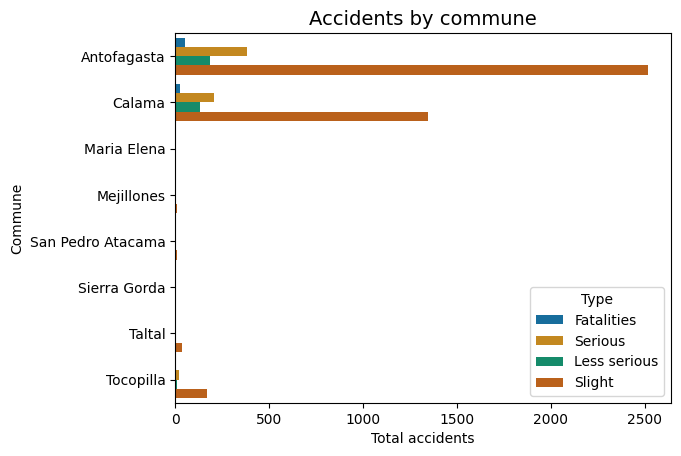

In [57]:
sns.barplot(df_total, x='Accidents', y='Commune', hue='Type', palette= 'colorblind') # Create a bar chart with seaborn.
                                                             # Accident types ('Type') are differentiated with different colors using 'hue'.
                                                             # Accident types ('Type') are differentiated with different colors using 'hue'.
                                                             # The colorblind palette is used, suitable for colorblind people.

plt.xlabel('Total accidents') # Designate the X-axis label as "Total Accidents".
plt.ylabel('Commune')  # Designate the Y-axis label as "Commune".
plt.title('Accidents by commune', fontsize=14) # Assign a title to the graph, using size 14.

# The communes with the highest number of traffic accidents are Antofagasta and Calama. In both, minor accidents dominate—over 2,500 in Antofagasta and more than 1,300 in Calama—followed by serious accidents
# (around 400 and 200, respectively). Given these figures, a more detailed breakdown of accidents in these two municipalities will be conducted.

## Antofagasta Commune

In [58]:
# A filter is applied to only consider the Antofagasta commune.
gdf_anto = gdfs_all[gdfs_all['Commune']== 'Antofagasta']

In [59]:
# The filtered data is grouped by year and sum of each accident type using '.groupby'.
# The DataFrame is then reorganized using '.unstack' and the index is reset with '.reset_index()'.
df_total_anto = gdf_anto.groupby('Year')[['Fatalities', 'Serious', 'Less serious', 'Slight']].sum().unstack().reset_index()

In [60]:
# Generated columns are renamed, using '.rename'.
df_total_anto.rename(columns={'level_0': 'Type',
                              0: 'Accidents'}, inplace=True)

In [61]:
# Convert the 'Year' column to string type so that years are treated as text (useful for categorical charts).
df_total_anto['Year'] = df_total_anto['Year'].astype(str)

Text(0.5, 1.0, 'Accidents Antofagasta')

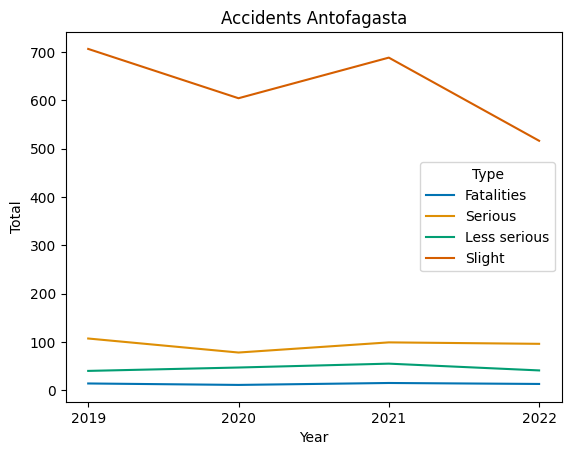

In [62]:
# The following is an intermediate graph (only exploratory).
sns.lineplot(df_total_anto, x='Year', y='Accidents', hue='Type', palette= 'colorblind') # The 'colorblind' palette is used to ensure visual accessibility.

# Add labels to the axes and a title to the graph.
plt.xlabel('Year') # X-axis label.
plt.ylabel('Total') # Y-axis label.
plt.title('Accidents Antofagasta') # Chart title.

# In Antofagasta, minor accidents are the most frequent, though they’ve declined since 2021, averaging around 500 per year. Serious accidents remain significantly lower, with about 100 annually.

The graph below was initially based on Stack Overflow code [6], but due to unsatisfactory results, Copilot was consulted using a prompt to generate two horizontal bar charts with consistent color order using Seaborn’s colorblind palette. The same approach was later applied to Calama, following the same structure used for Antofagasta.

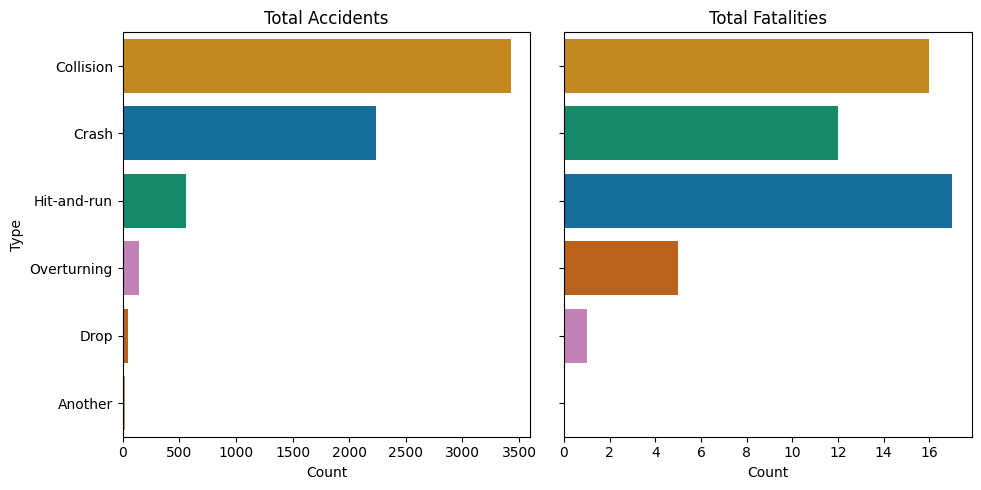

In [63]:
# A figure with 1 row and 2 columns of subplots is created using '.subplots'.
# 'figsize' defines the total size of the figure (10 inches wide by 5 inches high).
# sharey=True makes both subplots share the same Y-axis.
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Obtain the unique order of the accident types
# The color palette must be maintained so that both graphs display the same colors for the 'Types'.
# Write the following prompt in Copilot: 'Create code that can be used in a graph created with Seaborn that allows maintaining the
# order in the color palette of one of the data frame's columns.' Returning the following two lines as a response:
type_order = gdf_anto['Type'].value_counts().index
palette = dict(zip(type_order, sns.color_palette("colorblind", n_colors=len(type_order)))) # Create a consistent color palette using
                                                                                           # the colorblind-friendly palette.

# First plot: Counts the number of accidents by type in the entire DataFrame 'gdf_anto' and draws it in the first subplot (axs[0]).
sns.countplot(gdf_anto, y='Type', ax=axs[0], order=type_order, palette='colorblind', hue='Type', dodge=False,legend=False) # 'hue' and 'legend=False' were included because running the code without this resulted in the following message: Passing `palette` without
                                                                                                                          # assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y  variable to `hue` and set `legend=False` for the same effect'.
axs[0].title.set_text('Total Accidents') # assigns a title to the first subplot.
axs[0].set_xlabel('Count') # Label with capital 'C'.

# Second graph: Filter only accidents with at least one fatality and count how many there are per type, drawing it in the second subplot (axs[1]).
sns.countplot(gdf_anto[gdf_anto['Fatalities'] > 0], y='Type', ax=axs[1], order=type_order, palette='colorblind', hue='Type', dodge=False,legend=False)  # 'hue' and 'legend=False' were included because running the code without this resulted in the following message: Passing `palette` without
                                                                                                                                                        # assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y  variable to `hue` and set `legend=False` for the same effect'.
axs[1].title.set_text('Total Fatalities') # Assigns a title to the second subplot.
axs[1].set_xlabel('Count') # Etiqueta con 'C' mayúscula.

# Automatically adjusts the layout so that elements do not overlap
plt.tight_layout()

<Axes: xlabel='count', ylabel='Cause'>

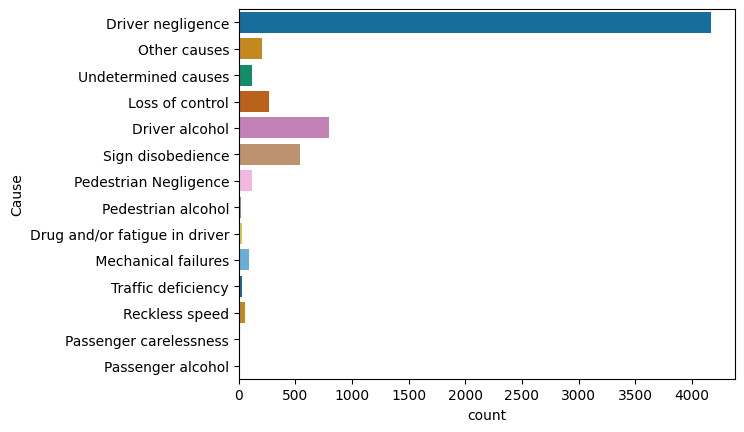

In [64]:
# A bar chart is created that counts the number of records for each value in the 'Cause' column. The Y-axis displays the different causes.
sns.countplot(gdf_anto, y='Cause', palette='colorblind', hue='Cause', dodge=False,legend=False)
# 'hue' and 'legend=False' were included because running the code without this resulted in the following message: Passing `palette` without
# assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y  variable to `hue` and set `legend=False` for the same effect'.

In [65]:
# The exact number of accidents is now displayed according to their causes.
# Se agrupa segun 'Cause' y luego se cuentan cuantas veces aparece cada una con '.count'.
gdf_anto.groupby('Cause')['Cause'].count().reset_index(name='Count') # con '.reset_index() se convierte 'Cause' en una columna.

Cause  Count
0             Mechanical failures     88
1                  Driver alcohol    796
2               Driver negligence   4170
3   Drug and/or fatigue in driver     26
4                 Loss of control    265
5                    Other causes    202
6               Passenger alcohol      2
7          Passenger carelessness     12
8           Pedestrian Negligence    119
9              Pedestrian alcohol     19
10                 Reckless speed     57
11              Sign disobedience    541
12             Traffic deficiency     28
13            Undetermined causes    116

The main cause of accidents in the Antofagasta commune is driver negligence, followed by driver alcohol.

## Commune of Calama

In [66]:
# A filter is made to only consider the Calama commune.
gdf_calama = gdfs_all[gdfs_all['Commune']== 'Calama']

In [67]:
# The filtered data is grouped by year and sum of each accident type using '.groupby'
# The DataFrame is then reorganized using '.unstack' and the index is reset with '.reset_index()'
df_total_calama = gdf_calama.groupby('Year')[['Fatalities', 'Serious', 'Less serious', 'Slight']].sum().unstack().reset_index()

In [68]:
# Generated columns are renamed, using '.rename'.
df_total_calama.rename(columns={'level_0': 'Type',
                              0: 'Accidents'}, inplace=True)

In [69]:
# Convert the 'Year' column to string type so that years are treated as text (useful for categorical charts).
df_total_calama['Year'] = df_total_calama['Year'].astype(str)

Text(0.5, 1.0, 'Accidents Calama')

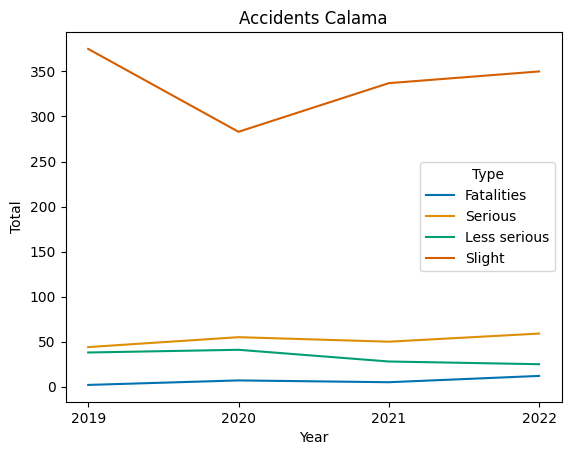

In [70]:
# The following is an intermediate (exploratory only) graph.
# The choice of the palette was based on the documentation ‘Choosing color palettes’ [7].
sns.lineplot(df_total_calama, x='Year', y='Accidents', hue='Type', palette= 'colorblind')    # The 'colorblind' palette is used to ensure visual accessibility.
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Accidents Calama')

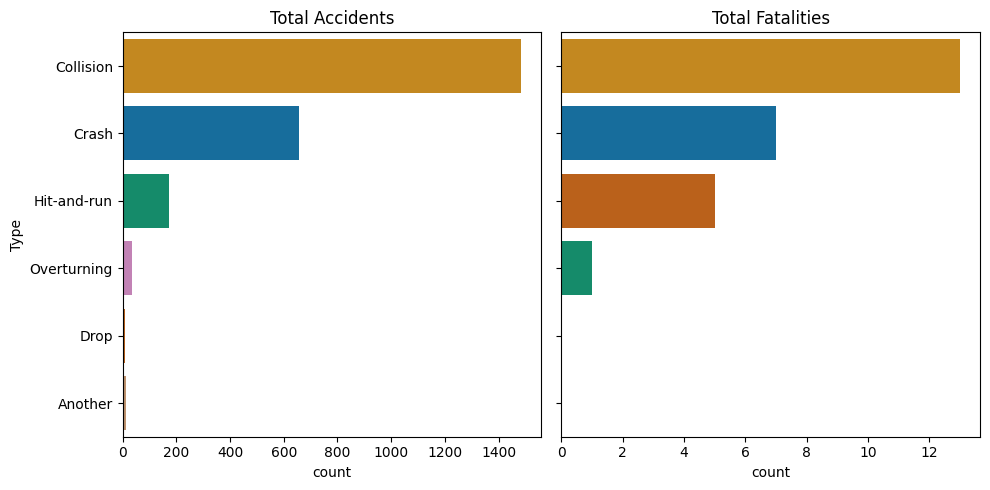

In [71]:
# A figure with 1 row and 2 columns of subplots is created using '.subplots'.
# 'figsize' defines the total size of the figure (10 inches wide by 5 inches high).
# sharey=True makes both subplots share the same Y-axis.
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Obtain the unique order of the accident types
# The color palette must be maintained so that both graphs display the same colors for the 'Types'.
# Write the following prompt in Copilot: 'Create code that can be used in a graph created with Seaborn that allows maintaining the
# order in the color palette of one of the data frame's columns.' Returning the following two lines as a response:
type_order = gdf_anto['Type'].value_counts().index
palette = dict(zip(type_order, sns.color_palette("colorblind", n_colors=len(type_order)))) # Create a consistent color palette using
                                                                                           # the colorblind-friendly palette.

# First plot: Counts the number of accidents by type in the entire DataFrame 'gdf_anto' and draws it in the first subplot (axs[0]).
sns.countplot(gdf_calama, y='Type', ax=axs[0], order=type_order, palette='colorblind', hue='Type', dodge=False,legend=False)  # 'hue' and 'legend=False' were included because running the code without this resulted in the following message: Passing `palette` without
                                                                                        # assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y  variable to `hue` and set `legend=False` for the same effect'.
axs[0].title.set_text('Total Accidents')

# Second graph: Filter only accidents with at least one fatality and count how many there are per type, drawing it in the second subplot (axs[1]).
sns.countplot(gdf_calama[gdf_calama['Fatalities'] > 0], y='Type', ax=axs[1], order=type_order, palette='colorblind', hue='Type', dodge=False,legend=False)   # 'hue' and 'legend=False' were included because running the code without this resulted in the following message: Passing `palette` without
                                                                                                                       # assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y  variable to `hue` and set `legend=False` for the same effect'.
axs[1].title.set_text('Total Fatalities')

# Automatically adjusts the layout so that elements do not overlap.
plt.tight_layout()

<Axes: xlabel='count', ylabel='Cause'>

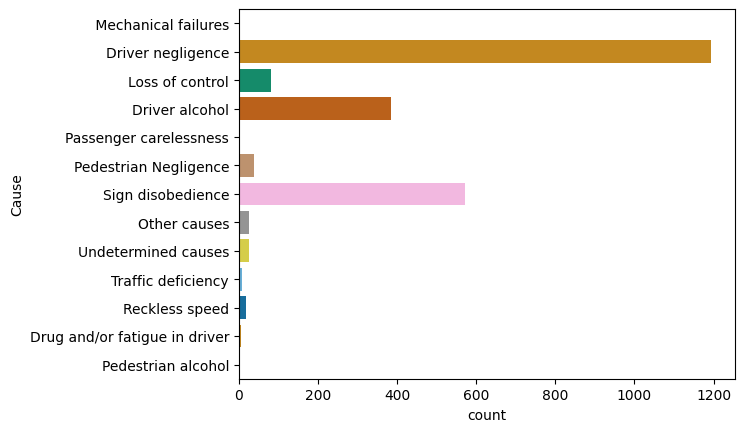

In [72]:
# A bar chart is created that counts the number of records for each value in the 'Cause' column. The Y-axis displays the different causes.
sns.countplot(gdf_calama, y='Cause', palette='colorblind', hue='Cause', dodge=False,legend=False)
# 'hue' and 'legend=False' were included because running the code without this resulted in the following message: Passing `palette` without
# assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y  variable to `hue` and set `legend=False` for the same effect'.

In [73]:
# The exact number of accidents is now displayed according to their causes.
# Se agrupa segun 'Cause' y luego se cuentan cuantas veces aparece cada una con '.count'.
gdf_calama.groupby('Cause')['Cause'].count().reset_index(name='Count') # con '.reset_index() se convierte 'Cause' en una columna.


Cause  Count
0             Mechanical failures      4
1                  Driver alcohol    385
2               Driver negligence   1194
3   Drug and/or fatigue in driver      5
4                 Loss of control     81
5                    Other causes     27
6          Passenger carelessness      4
7           Pedestrian Negligence     38
8              Pedestrian alcohol      2
9                  Reckless speed     18
10              Sign disobedience    573
11             Traffic deficiency      8
12            Undetermined causes     27

Driver negligence is the predominant cause in both cities, accounting for 57.3% of the total in Antofagasta and 47.3% in Calama. However, in Calama, a higher proportion of accidents is due to disobedience of traffic signs, at 22.7%, compared to 7.4% in Antofagasta, suggesting a more pronounced problem with regulatory compliance in that city.

##Spatial Exploration commune of Antofagasta

In [74]:
# Converts the GeoDataFrame 'gdf_anto' coordinate system to the UTM zone 19 South (EPSG:32719).
# This is useful for working with distances and areas in meters instead of decimal degrees.
gdf_anto_utm = gdf_anto.to_crs(epsg=32719)

In [75]:
# The current coordinate reference system (CRS) of the converted GeoDataFrame is displayed.
gdf_anto_utm.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [76]:
# Displays general information about the GeoDataFrame, such as the number of rows, columns, data types, and whether there are any null data.
# This is useful for getting a quick overview of the dataset structure.
gdf_anto_utm.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 6441 entries, 0 to 9226
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Year          6441 non-null   int32              
 1   Region        6441 non-null   object             
 2   Commune       6441 non-null   object             
 3   Date          6441 non-null   datetime64[ms, UTC]
 4   Type          6441 non-null   object             
 5   Cause         6441 non-null   object             
 6   Fatalities    6441 non-null   int32              
 7   Serious       6441 non-null   int32              
 8   Less serious  6441 non-null   int32              
 9   Slight        6441 non-null   int32              
 10  geometry      6441 non-null   geometry           
dtypes: datetime64[ms, UTC](1), geometry(1), int32(5), object(4)
memory usage: 478.0+ KB


In [77]:
# The '.sample' method randomly displays a row from the DataFrame.
gdf_anto_utm.sample()

Year              Region      Commune                      Date   Type  \
1365  2019  REGION ANTOFAGASTA  Antofagasta 2019-10-13 00:00:00+00:00  Crash   

                     Cause  Fatalities  Serious  Less serious  Slight  \
1365   Mechanical failures           0        0             0       0   

                           geometry  
1365  POINT (357825.11 7385539.737)

In [79]:
# The spatial boundaries (xmin, ymin, xmax, ymax) are defined in UTM coordinates.
# These values ​​will be used to clip a specific area of ​​the GeoDataFrame, corresponding to the municipality of Antofagasta.
xmin, ymin, xmax, ymax = [352600, 7372800, 360700, 7400700]

# The original GeoDataFrame is cropped using the boundaries defined above.
# The .cx[] method is used to select by spatial coordinates, and '.copy()' is used to avoid modifying the original.
gdf_anto_subset = gdf_anto.cx[xmin:xmax, ymin:ymax].copy()

<Axes: >

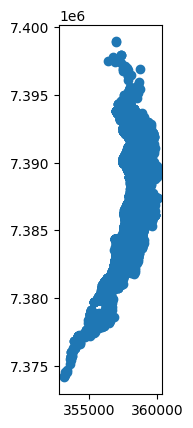

In [80]:
# A simple map is drawn to visualize whether the area was cropped correctly.
gdf_anto_subset.plot()

In [81]:
gdf_anto_subset.explore('Fatalities', cmap='autumn_r') # with '.explore' the map is displayed interactively, according to the 'Fatalities'.

Clusters were created to group accident occurrences in the commune of Antofagasta, using the elbow method to determine the optimal number. This section of the code was based on Practice 7 from the GEOG5990 module [7], complemented by the official documentation [8].

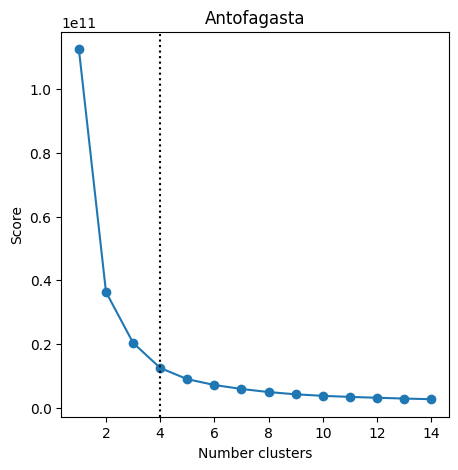

In [82]:
# A figure and a single axis (axs) are created for graphing, with a size of 5x5 inches.
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

# In order to generate the KMeans algorithm, the x, y coordinates are extracted from the geodataframe 'gdf_anto_subset'.
x = gdf_anto_subset.get_coordinates()

# A range of possible numbers of clusters (from 1 to 14) is defined to evaluate.
range_n_clusters = range(1, 15)
inertias = [] # An empty list is created that will store the values


# Iterate over each number of clusters in the defined range
for n_clusters in range_n_clusters:  # A KMeans model is created with the current number of clusters
    model_kmeans = KMeans(
                        n_clusters   = n_clusters,
                        n_init       = 20,  # n_init=20 means that the algorithm will be restarted 20 times to find the best solution.
                        random_state = 123  # random_state=123 ensures that the results are reproducible.
                    )
    model_kmeans.fit(x)  # Fit the model to the coordinate data.

    inertias.append(model_kmeans.inertia_)  # Saves the inertia of the model (indicates how compact the clusters are).

axs.plot(range_n_clusters, inertias, marker='o') # Inertia is plotted as a function of the number of clusterss
axs.set_title('Antofagasta')      # The graph is given a title.
axs.set_xlabel('Number clusters') # The x-axis label is designated.
axs.set_ylabel('Score')           # The y-axis label is designated.
axs.axvline(4, color='k', ls="dotted"); # A dotted vertical line is drawn at x=4 to indicate that 4 might be a good number of clusters.

In [83]:
# An empty list is created to store the cluster results.
clusters = []

# To apply the clustering algorithm it is necessary to extract the x and y coordinates.
x = gdf_anto_subset.get_coordinates()


# A KMeans model with 4 clusters is created (based on the previous analysis of the elbow method).
model = KMeans(n_clusters=4)


# The model is fitted to the data and predicts which cluster each point belongs to. An array containing the cluster label for each observation is obtained.
y_kmeans = model.fit_predict(x)

# Cluster labels are assigned to the empty list 'clusters'.
clusters = y_kmeans
print(len(clusters))  # Check that it matches the number of rows in 'gdf_anto_subset'.

6434


In [84]:
# The cluster labels (obtained with KMeans) are assigned as a new column called 'Cluster', so it can be identified to which group each point belongs.
gdf_anto_subset['Cluster'] = clusters

<Axes: >

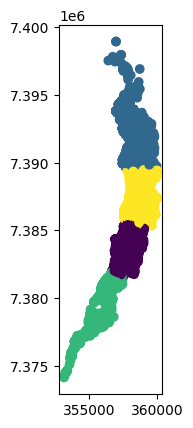

In [85]:
# A map is created where each point is identified with a color based on the value in the 'Cluster' column, thus visualizing the location of the clusters.
gdf_anto_subset.plot('Cluster')

 Four clusters suggested by the elbow method proved unsuitable—largely due to the high density of accident points and the elongated shape of the commune, which complicates spatial grouping. Given these limitations, the strategy shifted toward hexagonal clustering using Uber’s H3 grid system.

##Uber's H3 grid system

* Uber developed H3, a hierarchical hexagonal grid system for analyzing large-scale spatial data, which is open source. H3 allows for precise geographic data analysis, real-time pricing, and improved experience for riders and drivers. <a href="#ref11">[9]</a>
* Much of the code was based on the Medium article by Jesse Nestler. <a href="#ref12">[10]</a>

In [86]:
# Convert the coordinate system to WGS84 (EPSG:4326), which uses latitude and longitude (needed for mapping).
gdf_anto_subset = gdf_anto_subset.to_crs(epsg=4326)

In [87]:
# Define the H3 resolution to be used (9 in this case). The higher the number, the higher the resolution (smaller cells).
res = 9
col = f"H3_{res}" # Create the name of the new column that will store the H3 codes.

# A function is applied to each row of the GeoDataFrame to calculate the H3 code. The latitude (y) and longitude (x) of the point geometry are used.
# h3.latlng_to_cell is used instead of h3.geo_to_h3 due to library version changes, # https://github.com/uber/h3-py/issues/100
gdf_anto_subset[col] = gdf_anto_subset.apply(lambda row: str(h3.latlng_to_cell(row.geometry.y, row.geometry.x, res)), axis=1)

In [88]:
# Three random rows are displayed gdf_anto_subset.
gdf_anto_subset.sample(3)

Year              Region      Commune                      Date  \
3139  2020  REGION ANTOFAGASTA  Antofagasta 2020-01-22 00:00:00+00:00   
6060  2021  REGION ANTOFAGASTA  Antofagasta 2021-11-19 00:00:00+00:00   
6636  2021  REGION ANTOFAGASTA  Antofagasta 2021-05-06 00:00:00+00:00   

             Type              Cause  Fatalities  Serious  Less serious  \
3139        Crash  Driver negligence           0        0             0   
6060    Collision  Driver negligence           0        0             0   
6636  Hit-and-run  Driver negligence           0        0             0   

      Slight                     geometry  Cluster             H3_9  
3139       0  POINT (-70.39902 -23.64935)        0  89b22604517ffff  
6060       0  POINT (-70.38221 -23.60017)        3  89b2260657bffff  
6636       1  POINT (-70.39124 -23.61216)        3  89b22606023ffff

In [89]:
# Group the data by the H3 code and add the values ​​of the accident severity columns, thus obtaining the total number of accidents per H3 cell.
h3_df = gdf_anto_subset.groupby(col)[['Fatalities', 'Serious', 'Less serious', 'Slight']].sum().reset_index()

In [90]:
# A new column 'Total' is created representing the sum of all accident types per cell.
h3_df['Total'] = h3_df['Fatalities'] + h3_df['Serious'] + h3_df['Less serious'] + h3_df['Slight']
h3_df

H3_9  Fatalities  Serious  Less serious  Slight  Total
0    89b22604103ffff           0        1             1       4      6
1    89b22604107ffff           0        0             0       0      0
2    89b2260410bffff           0        0             0       3      3
3    89b2260410fffff           1        1             0      15     17
4    89b22604113ffff           0        0             1       1      2
..               ...         ...      ...           ...     ...    ...
352  89b22614e87ffff           0        0             0       1      1
353  89b22614e8bffff           0        0             0       0      0
354  89b22614ec3ffff           0        0             0       1      1
355  89b22614ed3ffff           0        0             0       0      0
356  89b22614ed7ffff           0        0             0       0      0

[357 rows x 6 columns]

Convert to Shapely Polygon

In [91]:
# A function called 'cell_to_shapely' is created that takes as input a cell code H3.
def cell_to_shapely(cell):
    coords = h3.cell_to_boundary(cell) # Gets the vertices of the H3 hexagon corresponding to the cell.# H3 library’s h3_to_geo_boundary function (renamed cell_to_boundary in v4.0.0)
    flipped = tuple(coord[::-1] for coord in coords) # The order of each coordinate is reversed from (lat, lon) to (lon, lat), which is the format Shapely expects.

    return Polygon(flipped) # Create and return a Shapely polygon from the vertices of the hexagon.

In [92]:
# The 'cell_to_shapely' function is applied to each value in column H3 (hexagonal codes), so that each H3 cell becomes a Shapely polygon representing its geographic shape.
h3_geoms = h3_df[col].apply(lambda x: cell_to_shapely(x))

# A GeoDataFrame is created from the DataFrame 'h3_df', using the generated polygons as geometry, indicating the geographic coordinate system WGS84 (EPSG:4326).
h3_gdf = gpd.GeoDataFrame(data=h3_df, geometry=h3_geoms, crs=4326)

In [93]:
# The first 5 rows are observed with '.head()'.
h3_gdf.head()

H3_9  Fatalities  Serious  Less serious  Slight  Total  \
0  89b22604103ffff           0        1             1       4      6   
1  89b22604107ffff           0        0             0       0      0   
2  89b2260410bffff           0        0             0       3      3   
3  89b2260410fffff           1        1             0      15     17   
4  89b22604113ffff           0        0             1       1      2   

                                            geometry  
0  POLYGON ((-70.40328 -23.67074, -70.4044 -23.67...  
1  POLYGON ((-70.40041 -23.67238, -70.40154 -23.6...  
2  POLYGON ((-70.4064 -23.67228, -70.40752 -23.67...  
3  POLYGON ((-70.40353 -23.67392, -70.40466 -23.6...  
4  POLYGON ((-70.40302 -23.66757, -70.40415 -23.6...

## Hexagons

* The mapping seeks to identify the areas with the most accidents and compare them with the accidents that resulted in fatalities.
* The source code used is the Geopandas documentation <a href="#ref11">[11]</a> and geojson of Antofagasta region <a href="#ref12">[12]</a>.



In [94]:
# The administrative boundary of the Antofagasta region is loaded and converted into a GeoDataFrame called gdf_dpa.
gdf_dpa = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/2.geojson')

In [95]:
# Convert the coordinate system of 'gdf_dpa', 'h3_gdf', 'gdf_anto_subset' to UTM zone 19 South (EPSG:32719).
gdf_dpa = gdf_dpa.to_crs(epsg=32719)
h3_gdf = h3_gdf.to_crs(epsg=32719)
gdf_anto_subset = gdf_anto_subset.to_crs(epsg=32719)

In [96]:
# The H3 hexagon GeoDataFrame is clipped to only include those within the 'gdf_dpa' boundary, thus removing hexagons that are outside the area of ​​interest.
h3_gdf = gpd.clip(h3_gdf, gdf_dpa)

In [97]:
# The subset of accidents is filtered to keep only those that have at least one fatality (> 0).
gdf_anto_subset_fatal = gdf_anto_subset[gdf_anto_subset['Fatalities'] > 0]

In [98]:
# A random row is displayed gdf_anto_subset.
gdf_anto_subset_fatal.sample()

Year              Region      Commune                      Date   Type  \
2529  2020  REGION ANTOFAGASTA  Antofagasta 2020-03-13 00:00:00+00:00  Crash   

                Cause  Fatalities  Serious  Less serious  Slight  \
2529  Loss of control           1        0             0       0   

                            geometry  Cluster             H3_9  
2529  POINT (357959.841 7387532.479)        3  89b2260602fffff

Since we want to show more than one layer on the map, `pd.explore` is used <a href="#ref13">[13]</a>.


In [99]:
# An interactive map is created with the H3 hexagon layer using '.explore'.
# Each hexagon is colored according to the 'Total' column using a blue color palette.
# The layer is named 'Total Accidents' for layer control.
m = h3_gdf.explore('Total', cmap='Blues', name='Total accidents')


# A second layer with fatal accident points is added to the same map (m), which are drawn in red and labeled as 'Fatal accidents'.
m = gdf_anto_subset_fatal.explore(m=m, name='Fatal accidents', color='red')
folium.LayerControl().add_to(m)

# The interactive map is displayed.
m


## Moran's Index


Spatial autocorrelation is categorized into global and local types [14]. The Global Moran Index measures the degree of spatial autocorrelation based on feature location and attribute values [15], but it does not identify the exact location of the autocorrelation [16]. To address this, the Local Moran Index (LISA) is used to pinpoint specific locations. This analysis will assess the presence of spatial autocorrelation in traffic accidents in Antofagasta using the Global Moran Index, and then determine its precise location through the Uber H3 methodology and LISA.

As for the code, the source corresponds to the jupyter nootbook by nbviewer <a href="#ref17">[17]</a>.

##Global Moran's Index

In [100]:
total = h3_gdf['Total'].values                    # Extract the values ​​from the 'Total' column of the GeoDataFrame h3_gdf.
w = Queen.from_dataframe(h3_gdf, use_index=False) # Create a Queen-type spatial weight matrix (neighbors that share an edge or vertex).
w.transform = 'r'                                 # Normalize the weights so that each row sums to 1 (this is recommended for the Moran index).


('WARNING: ', 277, ' is an island (no neighbors)')
('WARNING: ', 279, ' is an island (no neighbors)')
('WARNING: ', 356, ' is an island (no neighbors)')


/usr/local/lib/python3.11/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
 There are 3 islands with ids: 277, 279, 356.
  W.__init__(self, neighbors, ids=ids, **kw)


In [101]:
w = Queen.from_dataframe(h3_gdf, use_index=False) # Creates a spatial neighbor matrix (Queen type) from the GeoDataFrame.
moran = Moran(total, w)                           # Calculate the overall Moran's ratio using the 'Total' values ​​and the weight matrix.


moran.I                                           # Returns the value of the Moran index (measures spatial autocorrelation).

('WARNING: ', 277, ' is an island (no neighbors)')
('WARNING: ', 279, ' is an island (no neighbors)')
('WARNING: ', 356, ' is an island (no neighbors)')


np.float64(0.40331492827024923)

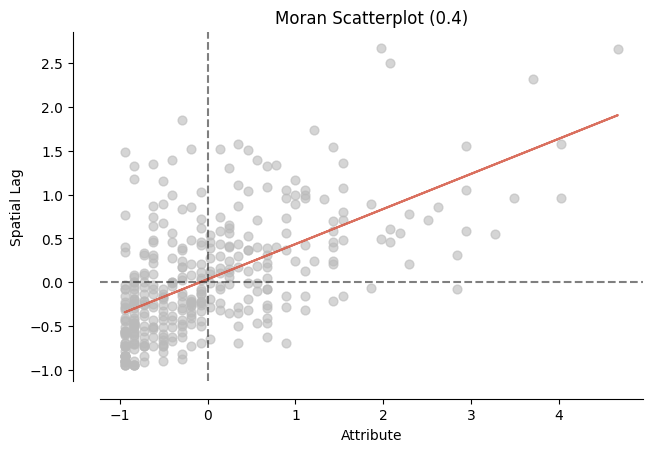

In [102]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)   # Create Moran scatter plot (original values ​​vs. spatially averaged values).


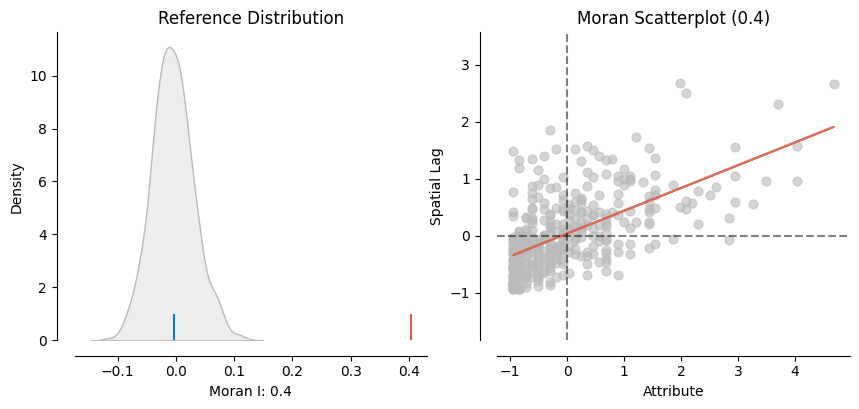

In [103]:
plot_moran(moran, zstandard=True, figsize=(10,4)) # The standardized Moran's chart (z values) is drawn, with custom size.
plt.show()                                        # Displays the graph on the screen.


In [104]:
moran.p_sim  # '.p_sim' is used to determine whether the specific autocorrelation is statistically significant.

# If moran.p_sim < 0.05, there is statistical evidence of spatial autocorrelation.
# If moran.p_sim >= 0.05, there is insufficient evidence to claim autocorrelation exists


np.float64(0.001)

The histogram shows a normal distribution of the data, with Moran’s Index (0.4) marked in red. The observed value is shifted to the right of the simulated distribution, indicating significant positive spatial autocorrelation—suggesting that similar values tend to cluster geographically. Additionally, a p_sim value below 0.05 provides statistical evidence supporting this autocorrelation.

##Local Moran Index (LISA)

/usr/local/lib/python3.11/dist-packages/esda/moran.py:1350: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


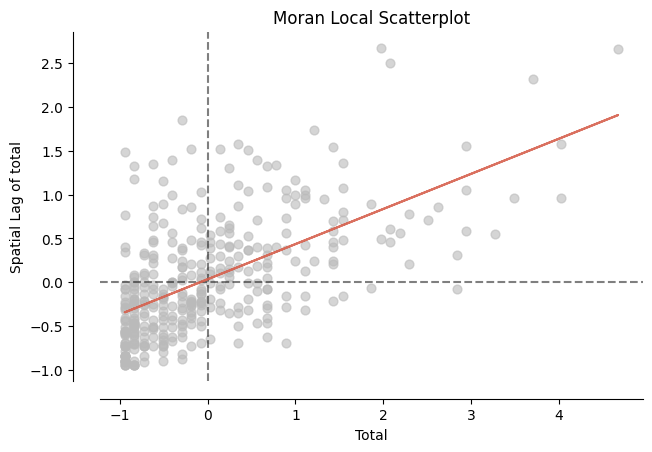

In [105]:
# The Local Moran Index (LISA) is calculated for each observation in the GeoDataFrame, allowing local clusters of high or low values ​​to be identified.
moran_loc = Moran_Local(total, w)
fig, ax = moran_scatterplot(moran_loc, zstandard=True)  # A Moran scatter plot is created using the local values.
                                                        # zstandard=True standardizes values ​​for ease of interpretation.

ax.set_xlabel('Total')                  # Label the X-axis with the name of the original variable.
ax.set_ylabel('Spatial Lag of total')   # The Y axis is labeled with the name of the spatial lag of the variable.
plt.show()                              # The graph is displayed.

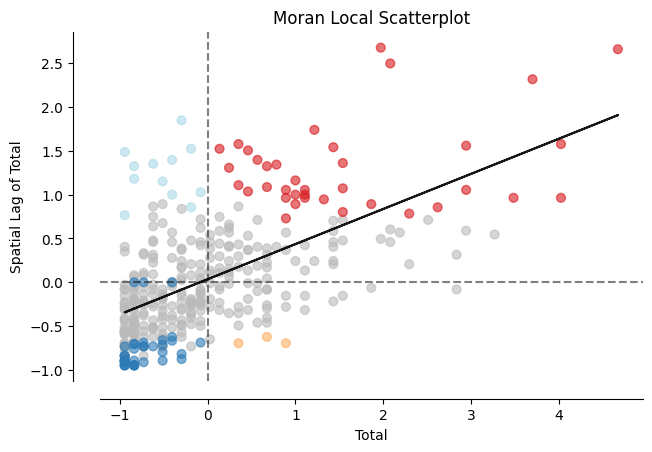

In [106]:
# A Local Moran's Scatterplot (LISA) is generated, highlighting points with statistical significance (p < 0.05), allowing for the identification of relevant local clusters.
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Total')                # X-axis label.
ax.set_ylabel('Spatial Lag of Total') # Y-axis label.
plt.show()                            # The graph is displayed.grafico.

 Interpretation relies on the graph’s quadrants [18]: High-High and Low-Low indicate clusters of high or low accident concentrations, respectively, while High-Low and Low-High suggest potential spatial outliers.

(7372800.0, 7400700.0)

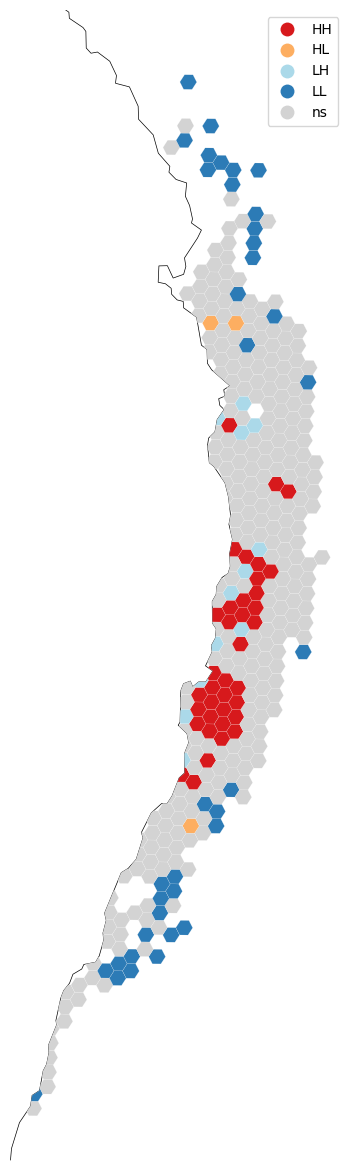

In [107]:
# The base map with the administrative boundaries is drawn (gdf_dpa).
base = gdf_dpa.plot(color='White',      # The fill colour is chosen.
                    edgecolor='black',  # The colour of the contour line of the regions is chosen.
                    linewidth=0.5,      # Border line thickness.
                    figsize=(10, 15))   # Figure size (width x height).

# The results of the LISA analysis are superimposed on the base map.
# Only statistically significant clusters (p < 0.05) are shown.
lisa_cluster(moran_loc, h3_gdf, p=0.05, ax=base, figsize = (10, 15))

# The horizontal boundary of the map is adjusted to focus on the commune of Antofagasta.
base.set_xlim((xmin, xmax))

# The vertical limit of the map is adjusted to focus on the commune of Antofagasta.
base.set_ylim((ymin, ymax))

#Data Visualisation

##Non-spatial visualization

A combined vertical bar graph was created to represent the total number of accidents by type and total fatalities for both Antofagasta and Calama. This format was chosen because, as noted by Esselman (2021), vertical bar charts are ideal for displaying ordinal data, such as municipalities and accident types [19]. The color palette used follows accessibility guidelines from “Choosing Color Palettes,” ensuring it is suitable for individuals with color vision deficiencies [20]. Designed for clarity, the graph targets both the general public—to raise awareness about traffic accident severity—and policymakers focused on road safety education and regulation enforcement.

Since the graphs presented are easy to interpret, they are aimed at both the general population—with the goal of raising awareness about the seriousness of traffic accidents and encouraging more responsible road behavior—and at decision-makers in the field of public policy, especially those focused on road safety education and enforcement of traffic regulations.

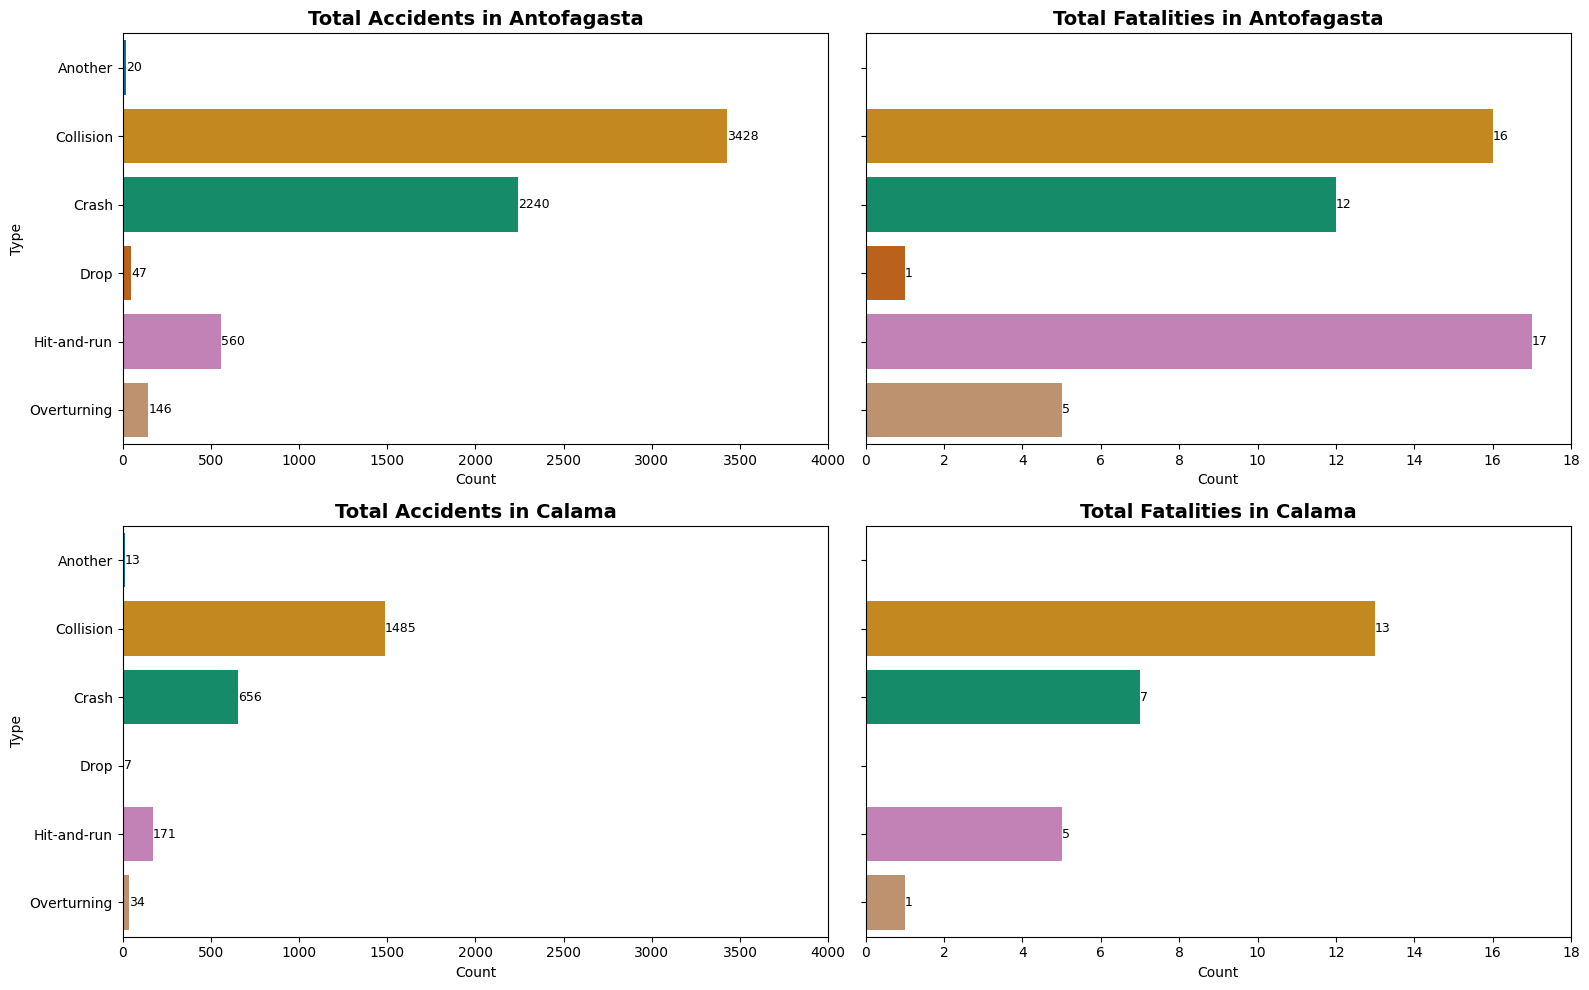

In [109]:
# Create the figure with 2 rows and 2 columns of subgraphs
fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharey=True)

# Define the order of the accident types based on the complete set
# The color palette must be maintained so that both charts display the same colors for the 'Types'.
# Write the following prompt in Copilot: 'Create code that can be used in a chart made with Seaborn that allows maintaining the
# order in the color palette of one of the data frame's columns.' Returning the following lines that define 'type_order' and 'palette' as a response.
type_order = sorted(set(gdf_anto['Type']).union(set(gdf_calama['Type'])))

# Function to add labels to the bars.
def add_labels(ax): # ax represents the axis.
    for container in ax.containers: # Loop through all BarContainers that exist on the ax axis.
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9) # Use Matplotlib's bar_label() function to add numeric labels to each bar in the bin.


# Create a consistent color palette, assigning a unique color to each accident type.
# Use the "colorblind" palette to ensure good visibility.
palette = dict(zip(type_order, sns.color_palette("colorblind", n_colors=len(type_order)))) # Create a consistent color palette using
                                                                                           # the colorblind-friendly palette.

# Antofagasta - Total accidents (chart 1)
ax= sns.countplot(data=gdf_anto,     # 'sns.countplot' creates a bar chart that counts how many times each category appears in the 'Type' column of the gdf_anto DataFrame.
                  y='Type',
                  ax=axs[0, 0],      # Draw the chart in the first cell (row 0, column 0) of the previously created subchart grid.
                  order=type_order,  # Ensures that accident types are displayed in a specific order in all charts.
                  palette=palette,   # The previously created palette is used.
                  hue='Type', dodge=False,legend=False)   # 'hue' and 'legend=False' were included because running the code without this resulted in the following message: Passing `palette` without
                                                          # assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y  variable to `hue` and set `legend=False` for the same effect'.

axs[0, 0].set_title('Total Accidents in Antofagasta',  # Sets the title of the chart located at position [0, 0] (top left corner).
                    fontsize=14,                       # fontsize=14 defines the font size.
                    fontweight='bold')                 # fontweight='bold' makes the title text bold.
axs[0, 0].set_xlabel('Count')                          # Set the x-axis label to position [0,0].

# Copilot is asked how to create a range limit to match both graphs, through the following prompt:
# 'Create a code in python using sseaborn that allows defining the x-axis limits at 0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000.
# This same code is used for the other 3 graphs, adjusting the range as appropriate.
axs[0, 0].set_xlim(0, 4000) # Sets the range of the X axis, which goes from 0 to 4000.
axs[0, 0].set_xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]) # Define the divisions
add_labels(ax)             # Labels are added to the bars


# Antofagasta - Fatalities (chart 2)
ax= sns.countplot(data=gdf_anto[gdf_anto['Fatalities'] > 0], # Filter only accidents with at least one fatality,
                  y='Type',                                  # and count how many there are of each type,
                  ax=axs[0, 1],                              # drawing it in the second subplot (axs[1]).
                  order=type_order,                          # Ensures that accident types are displayed in a specific order in all charts.
                  palette=palette,                           # The previously created palette is used
                  hue='Type', dodge=False,legend=False)      # 'hue' and 'legend=False' were included because running the code without this resulted in the following message: Passing `palette` without
                                                             # assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y  variable to `hue` and set `legend=False` for the same effect'.

axs[0, 1].set_title('Total Fatalities in Antofagasta',      # Sets the title of the chart located at position [0, 1] (top right corner).
                    fontsize=14,                            # fontsize=14 defines the font size.
                    fontweight='bold')                      # fontweight='bold' makes the title text bold.

axs[0, 1].set_xlabel('Count')   # Set the x-axis label to position [0,1].
axs[0, 1].set_xlim(0, 18)       # Sets the range of the X axis, which goes from 0 to 18.
axs[0, 1].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18]) # Define the divisions.
add_labels(ax)                  # Labels are added to the bars.


# Calama - Total accidents (chart 3)
ax= sns.countplot(data=gdf_calama,              # 'sns.countplot' creates a bar chart that counts how many times each category appears in the 'Type' column of the gdf_calama DataFrame.
                  y='Type',
                  ax=axs[1, 0],                 # Draw the chart in the first cell (row 1, column 0) of the previously created subchart grid.
                  order=type_order,             # Ensures that accident types are displayed in a specific order in all charts.
                  palette=palette,              # The previously created palette is used.
                  hue='Type', dodge=False,legend=False)      # 'hue' and 'legend=False' were included because running the code without this resulted in the following message: Passing `palette` without
                                                             # assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y  variable to `hue` and set `legend=False` for the same effect'.

axs[1, 0].set_title('Total Accidents in Calama',    # Sets the title of the chart located at position [1, 0] (bottom left corner).
                    fontsize=14,                    # fontsize=14 defines the font size.
                    fontweight='bold')              # fontweight='bold' makes the title text bold.

axs[1, 0].set_xlabel('Count')  # Set the x-axis label to position [1,0]
axs[1, 0].set_xlim(0, 4000)    # Sets the range of the X axis, which goes from 0 to 4000.
axs[1, 0].set_xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]) # Define the divisions.
add_labels(ax)   # Labels are added to the bars.


# Calama - Fatalities (chart 4)
ax= sns.countplot(data=gdf_calama[gdf_calama['Fatalities'] > 0],# Filter only accidents with at least one fatality,
                  y='Type',                            # and count how many there are of each type,
                  ax=axs[1, 1],                        # drawing it on the second subplot (axs[1]).
                  order=type_order,                    # Ensures that accident types are displayed in a specific order in all charts.
                  palette=palette,                     # The previously created palette is used.
                  hue='Type', dodge=False,legend=False)     # 'hue' and 'legend=False' were included because running the code without this resulted in the following message: Passing `palette` without
                                                            # assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y  variable to `hue` and set `legend=False` for the same effect'.

axs[1, 1].set_title('Total Fatalities in Calama',      # Sets the title of the chart located at position [1, 1] (bottom right corner).
                    fontsize=14,                       # fontsize=14 defines the font size.
                    fontweight='bold')                 # fontweight='bold' makes the title text bold.

axs[1, 1].set_xlabel('Count')  # Set the x-axis label to position [1,1].
axs[1, 1].set_xlim(0, 18)      # Set the range of the X axis.
axs[1, 1].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18]) # Define the divisions.
add_labels(ax)                 # Labels are added to the bars


# Adjust layout
plt.tight_layout()
plt.show() # Graphics are displayed in a single image.


When comparing both municipalities, Antofagasta  reports a higher number of accidents and fatalities across most categories, likely due to its larger population and heavier traffic flow. Despite lower figures, Calama exhibits similar patterns in accident types and causes. In both cities, collisions are the most common, representing over 58% of total accidents. However, in Calama, they account for 50% of fatalities, while in Antofagasta, deaths are more evenly distributed among collisions (30.8%), run-overs (32.7%), and crashes (23.1%). Notably, hit-and-run accidents are proportionally more lethal in Antofagasta, comprising 9.5% of accidents but 32.7% of deaths, compared to 6.9% and 11.5%, respectively, in Calama.

#Spatial visualization

A static map was created to summarize the spatial distribution of traffic accidents grouped into hexagonal cells, along with the specific locations of fatal incidents. This visualization, generated using the pd.explore tool, is based on code annotated with references from Practice 6 of the GEOG5990 module [21], includes  north arrow [22] and a cartographic source attribution adapted from Medium [23].

Targeted at transportation professionals, researchers, and policymakers, the map leverages the H3 hexagonal grid system to enable detailed and scalable spatial analysis of road accidents, supporting future studies and urban planning efforts. Additionally, the color scheme—red and blue—was chosen for accessibility, following recommendations by Phillips (2022) to ensure readability for colorblind users [24].

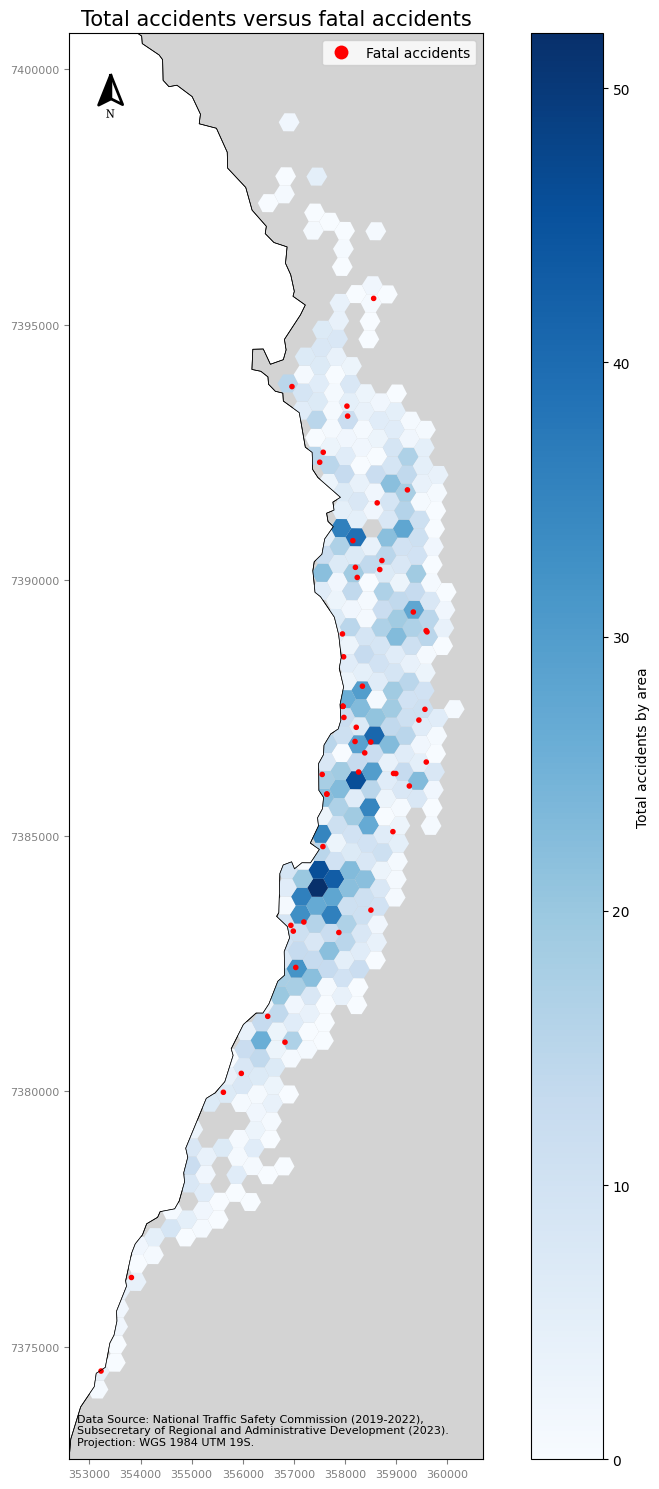

In [115]:
# The base map with the administrative boundaries is drawn (gdf_dpa).
base = gdf_dpa.plot(color='lightgrey', # The fill colour is chosen.
                    edgecolor='black', # The colour of the contour line of the regions is chosen.
                    linewidth=0.5,     # Border line thickness.
                    figsize=(10, 15))  # Figure size (width x height).

# A layer with total accident data by area is added (h3_gdf).
h3_gdf.plot(ax=base,         # It is drawn on the base map.
            column='Total',  # Column to use for coloring.
            cmap='Blues',    # Color palette (blues).
            legend=True,     # Legend is displayed.
            legend_kwds={'label': 'Total accidents by area'})  # Legend tag.

# Another layer with fatal accidents is superimposed (gdf_anto_subset_fatal).
gdf_anto_subset_fatal.plot('Commune',                                     # A column needs to be added to display the legend.
                             ax=base,                                     # It is drawn on the same base map.
                             marker='.',                                  # Marker type (point).
                             cmap='autumn',                               # A cmap is assigned, since, when entering the color parameter, the legend is lost.
                             legend=True,                                 # Legend is displayed.
                             legend_kwds={'labels': ['Fatal accidents']}) # The legend is renamed.


# Setting the chart axes.
base.tick_params(axis='both',   # specifies that the changes will be applied to both axis.
                 which='major', # indicates that the changes will be applied to the major ticks.
                 labelsize=8,   # the font size of the mark labels.
                 colors='grey') # Color de las etiquetas.


# The graph limits (coordinates) are set.
base.set_xlim((xmin, xmax))   # Horizontal limit (x).
base.set_ylim((ymin, ymax))   # Vertical limit (y).


# Eliminates scientific coordinate notation.
base.ticklabel_format(style='plain')


# A title is added to the graph
plt.title('Total accidents versus fatal accidents',
          fontdict={'fontsize': '15',    # Sets the font size of the label to 15.
                    'fontweight' : '3'}) # Font weight.

# The following code follows the model of class 6 of this course, in ‘Week_6_Python_as_a_GIS.ipynb’.
# add a North arrow (look at the documentation here: https://github.com/pmdscully/geo_northarrow)
add_north_arrow(ax=base,
                scale=.30, # a value of 0.30 means that the arrow will be reduced to 30% of its original size.
                xlim_pos=0.1, # it the horizontal position of the north arrow on the chart.
                ylim_pos=.95, # is the vertical position of the north arrow on the chart.
                color='#000', # the colour of the arrow is set, #000’ is the hex code for the colour black.
                text_scaler=2, # doubles the size of the text (=2).
                text_yT=-1.45) # is the vertical position of the text.

# The following line of code was obtained from the following source, modifying the xy parameters for its position: https://medium.com/@alex_44314/use-python-geopandas-to-make-a-us-map-with-alaska-and-hawaii-39a9f5c222c6
base.annotate('''
Data Source: National Traffic Safety Commission (2019-2022),
Subsecretary of Regional and Administrative Development (2023).
Projection: WGS 1984 UTM 19S.''',
              xy=(0.02, 0.01),  # The xy parameter is manually modified to adjust its position.
              xycoords='axes fraction', # Is linked to the xy position
              fontsize=8) # The font size is adjusted


# Redraw gdf_dpa borders on top of everything
# If the code is run up to this point, the h3_gdf and gdf_anto_subset_fatal layers cover gdf_dpa,
# so Copiltot was asked for help with the following prompt: Tell me how to display a layer above the others, so that its outline can be seen?
# The result is the line below:
gdf_dpa.boundary.plot(ax=base,           # Draws the edges (boundaries) of the polygons in the GeoDataFrame 'gdf_dpa' over an existing graphic called 'base'.
                                         # 'boundary' accesses only the polygon boundaries, without filling them
                      edgecolor='black', # Sets the border color of polygons to black.
                      linewidth=0.5)     # sets the thickness of the border lines to 0.5 (thin).

# Automatically adjusts chart elements so they do not overlap.
plt.tight_layout()


The map displays the Antofagasta commune divided into hexagonal cells using Uber’s H3 methodology, with each hexagon representing the total number of traffic accidents. A blue color scale indicates accident density—lighter shades for fewer accidents and darker shades for higher concentrations—while red dots mark the exact locations of fatal accidents. The highest accident density is observed in the city center, aligning with areas of intense vehicular flow. However, fatalities are more dispersed and tend to cluster toward the northern part of the city, suggesting the influence of additional factors on accident severity in that area.

## References
<p><a href="https://mapas-conaset.opendata.arcgis.com/datasets/50c493754b5d434c8a1c44b96a6e6e44_0/explore?location=-23.708570%2C-69.342709%2C7.95">[1]</a>Comision Nacional de Seguridad de Transito [CONASET]. 2021. Siniestros de tránsito, región de Antofagasta, Chile, 2019. [Online]. [Accessed 5 May 2025].</p>
<p><a href="https://www.google.com/url?q=https%3A%2F%2Fmapas-conaset.opendata.arcgis.com%2Fdatasets%2F5169f61c547e4be9acbc8c4a7b778821_0%2Fexplore%3Flocation%3D-23.708640%252C-69.339105%252C7.95">[2]</a>Comision Nacional de Seguridad de Transito [CONASET]. 2024. 2020 - Antofagasta - Siniestros Individuales. [Online]. [Accessed 5 May 2025].</p>
<p><a href="https://www.google.com/url?q=https%3A%2F%2Fmapas-conaset.opendata.arcgis.com%2Fdatasets%2F66fa006d1ea04129965d500b82247352_0%2Fexplore%3Flocation%3D-23.397157%252C-69.345849%252C7.76">[3]</a>Comision Nacional de Seguridad de Transito [CONASET]. 2024. 2021 - Antofagasta - Siniestros Individuales. [Online]. [Accessed 5 May 2025].</p>
<p><a href="https://mapas-conaset.opendata.arcgis.com/datasets/5ce75f6238ac4d89ad4a00969a0fbaaf_0/about">[4]</a>Comision Nacional de Seguridad de Transito [CONASET]. 2024. 2022- Antofagasta - Siniestros Individuales. [Online]. [Accessed 5 May 2025].</p>
<p><a href="https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns">[5]</a>Stack Overflow. 2013. Python pandas remove duplicate columns. [Online]. [Accessed 6 May 2025].</p>
<p><a href="https://stackoverflow.com/questions/25239933/how-to-add-a-title-to-each-subplot">[6]</a> Stack Overflow. 2015. How to add a title to each subplot. [Online]. [Accessed 8 May 2025].</p>
<p><a href="https://colab.research.google.com/github/FrancescaPontin/GEOG5990M/blob/main/notebooks/Week_7_Spatial_Analysis.ipynb">[7]</a>GEOG5990 Programming for Geographical Information Analysis: Core Skills. 2025. Class 7 [Online]. [Accessed 8 May 2025].</p>
<p><a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">[8]</a>Scikit Learn. 2025. KMeans. [Online]. [Accessed 9 May 2025].</p>
<p><a href="hhttps://www.uber.com/en-GB/blog/h3/">[9]</a>Brodsky, I. 2018. H3: Uber’s Hexagonal Hierarchical Spatial Index. [Online]. [Accessed 11 May 2025].</p>
<p><a href="https://medium.com/@jesse.b.nestler/how-to-convert-h3-cell-boundaries-to-shapely-polygons-in-python-f7558add2f63">[10]</a>Nestler, J. 2023. How to convert H3 cell boundaries to Shapely polygons in Python. [Online]. [Accessed 10 May 2025].</p>
<p><a href="https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot">[11]</a>GeoPandas. 2025. Documentation. [Online]. [Accessed 12 May 2025].</p>
<p><a href="https://github.com/caracena/chile-geojson">[12]</a>Github Caracena. 2019. Chile-geojson. [Online]. [Accessed 11 May 2025].</p>
<p><a href="https://stackoverflow.com/questions/73767559/geopandas-explore-how-to-plot-more-than-one-layer">[13]</a>Stack Overflow. 2023. Geopandas.explore - How to plot more than one layer?. [Online]. [Accessed 12 May 2025].</p>
<p><a href="https://dces.webhosting.cals.wisc.edu/wp-content/uploads/sites/128/2013/08/W4_Anselin1995.pdf">[14]</a>Anselin, L. 1995. Local Indicators of Spatial Association - LISA. [Online]. [Accessed 17 May 2025].</p>
<p><a href="https://pro.arcgis.com/es/pro-app/latest/tool-reference/spatial-statistics/spatial-autocorrelation.html">[15]</a>ESRI. 2025. Spatial Autocorrelation. [Online]. [Accessed 17 May 2025].</p>
<p><a href="https://www.tandfonline.com/doi/full/10.1080/00045608.2014.958389">[16]</a>Grubesic, T.H., Wei, R., Murray, A.T. 2014. Spatial Clustering Overview and Comparison: Accuracy, Sensitivity, and Computational Expense. [Online]. [Accessed 17 May 2025].</p>
<p><a href="https://nbviewer.org/github/pysal/splot/blob/main/notebooks/esda_morans_viz.ipynb">[17]</a>Jupyter nbviewer. 2025. Exploratory Analysis of Spatial Data: Visualizing Spatial Autocorrelation with splot and esda. [Online]. [Accessed 17 May 2025].</p>
<p><a href="https://www.tandfonline.com/doi/full/10.1080/10095020.2024.2336593#abstract">[18]</a> Deng, H., Liu, K. and Feng, J. 2024. Understanding the impact of modifiable areal unit problem on urban vitality and its built environment factors. Geo-spatial Information Science. [Online]. [Accessed 18 May 2025].</p>
<p><a href="https://www.storytellingwithdata.com/blog/2022/1/21/which-bar-orientation-should-i-use">[19]</a>Esselman, A. 2021. Which bar chart orientation should I use? [Online]. [Accessed 7 May 2025].</p>
<p><a href="https://seaborn.pydata.org/tutorial/color_palettes.html">[20]</a>Seaborn. 2024. Choosing color palettes. [Online]. [Accessed 7 May 2025].</p>
<p><a href="https://stackoverflow.com/questions/25239933/
<p><a href="https://colab.research.google.com/drive/1Fl1Ff15QsHwyE9ve_IaS5If594ICr5MTb">[21]</a>GEOG5990 Programming for Geographical Information Analysis: Core Skills. 2025. Class 6 [Online]. [Accessed 9 May 2025]. [Online]. [Accessed 5 May 2025].</p>
<p><a href="https://github.com/pmdscully/geo_northarrow">[22]</a>Github pmdscully. 2023. Geo_northarrow. [Online]. [Accessed 7 May 2025].</p>
<p><a href="https://medium.com/@alex_44314/use-python-geopandas-to-make-a-us-map-with-alaska-and-hawaii-39a9f5c222c6">[23]</a>Rich, A. 2023. Use Python geopandas to make a US map with Alaska and Hawaii. [Online]. [Accessed 11 May 2025].</p>
<p><a href="https://www.nceas.ucsb.edu/sites/default/files/2022-06/Colorblind%20Safe%20Color%20Schemes.pdf">[24]</a> Phillips, A. 2022. Colorblind Safe Color Schemes. [Online]. [Accessed 18 May 2025].</p>

## Acknowledgements

- “I acknowledge the use of Co-pilot (Microsoft https://chat.openai.com/ Accessed 2025-5-06) to support the identification of the data. Prompt: Define each of the columns found in the attached CSV, in no more than 20 words.

- “I acknowledge the use of Co-pilot (Microsoft https://chat.openai.com/ Accessed 2025-5-07) to support the improvement of a bar chart. Prompt: Create a python code using the seaborn library, that displays two horizontal bar charts that follow the order of the colours using the colourblind palette'.

- “I acknowledge the use of Co-pilot (Microsoft https://chat.openai.com/ Accessed 2025-5-16) to support the improvement of a bar chart. Prompt: 'Create a code in python using seaborn that allows defining the x-axis limits at 0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000.'.
